# Load library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaning data

In [2]:
orders = pd.read_csv('orders_clean_V1.csv')
orderlines = pd.read_csv('orderlines_clean_V1.csv')
products = pd.read_csv('product_clean_v1.csv')
brands = pd.read_csv('brands_clean_V1.csv')

In [3]:
brands.info() # There are 187 brands

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


# Exploring all tables

## Brands table

In [4]:
brands.head() # short name is the first three characters in sku attribute

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


## Orders table

In [5]:
orders.info() # There is no missing values in this table (183.283 orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183283 entries, 0 to 183282
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      183283 non-null  int64  
 1   created_date  183283 non-null  object 
 2   total_paid    183283 non-null  float64
 3   state         183283 non-null  object 
 4   check_orders  183283 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 5.8+ MB


In [6]:
orders.sample(5)

,order_id,created_date,total_paid,state,check_orders
138437,466969,2017-12-19 17:01:27,359.00,Shopping Basket,True
40733,348910,2017-04-23 15:15:45,164.98,Completed,True
145568,476454,2017-12-29 16:37:13,635.59,Completed,True
179417,522175,2018-03-06 13:10:50,86.99,Completed,True
111056,434429,2017-11-23 12:41:45,351.82,Shopping Basket,True


In [7]:
orders.state.value_counts()

Shopping Basket    107607
Completed           33383
Place Order         24271
Pending             12368
Cancelled            5654
Name: state, dtype: int64

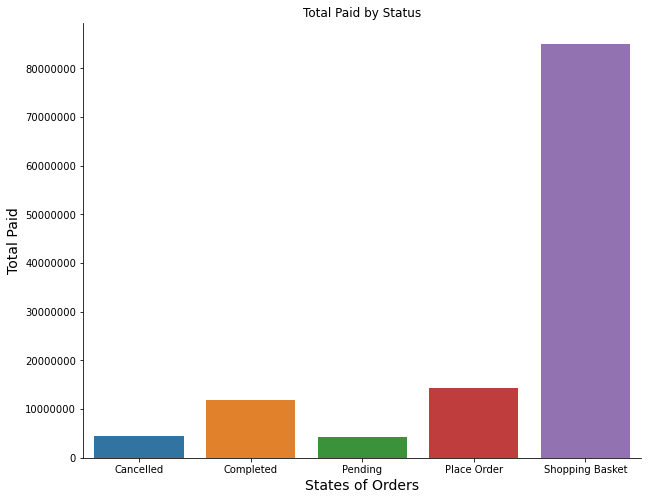

In [8]:
plt.figure(figsize = (10,8))
ax = sns.barplot(data = orders.groupby('state').agg({'total_paid': 'sum'}).reset_index(), x = 'state', y = 'total_paid')
plt.xlabel('States of Orders', fontsize = 14)
plt.ylabel('Total Paid', fontsize = 14)
plt.title('Total Paid by Status')
sns.despine() # remove the top and right margin, to make your plot prettier 
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

In [9]:
print(f'Total revenue is {orders.total_paid.sum()}')

Total revenue is 120017301.88


In [10]:
orders.check_orders.value_counts() # All check orders are True

True    183283
Name: check_orders, dtype: int64

In [11]:
orders['created_date'] = pd.to_datetime(orders['created_date'])

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183283 entries, 0 to 183282
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      183283 non-null  int64         
 1   created_date  183283 non-null  datetime64[ns]
 2   total_paid    183283 non-null  float64       
 3   state         183283 non-null  object        
 4   check_orders  183283 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.8+ MB


### Create year, month, day, week_year columns

In [13]:
orders = orders.assign(year = orders['created_date'].dt.year,
             month_num = orders['created_date'].dt.month,
             week_year = orders['created_date'].dt.week,
             month = orders['created_date'].dt.strftime('%b'),
             month_year = orders['created_date'].dt.to_period(freq='M'))

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\2001782898.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_year = orders['created_date'].dt.week,


In [14]:
orders

,order_id,created_date,total_paid,state,check_orders,year,month_num,week_year,month,month_year
0,241319,2017-01-02 13:35:40,44.99,Cancelled,True,2017,1,1,Jan,2017-01
1,242832,2017-12-31 17:40:03,15.76,Completed,True,2017,12,52,Dec,2017-12
2,243784,2017-11-24 13:35:19,157.86,Cancelled,True,2017,11,47,Nov,2017-11
3,245275,2017-06-28 11:35:37,149.00,Completed,True,2017,6,26,Jun,2017-06
4,245851,2017-04-04 20:58:21,79.99,Pending,True,2017,4,14,Apr,2017-04
...,...,...,...,...,...,...,...,...,...,...
183278,527397,2018-03-14 13:56:38,42.99,Place Order,True,2018,3,11,Mar,2018-03
183279,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True,2018,3,11,Mar,2018-03
183280,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True,2018,3,11,Mar,2018-03
183281,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True,2018,3,11,Mar,2018-03


## orderlines table

In [15]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264767 entries, 0 to 264766
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                264767 non-null  int64  
 1   id_order          264767 non-null  int64  
 2   product_id        264767 non-null  int64  
 3   product_quantity  264767 non-null  int64  
 4   sku               264767 non-null  object 
 5   unit_price        264767 non-null  float64
 6   date              264767 non-null  object 
 7   total_price       264767 non-null  float64
 8   check_orders      264767 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 16.4+ MB


In [16]:
orderlines['date'] = pd.to_datetime(orderlines['date']) # Casting date from object to datetime

In [17]:
orderlines.check_orders.value_counts() # All items has check_orders status True

True    264767
Name: check_orders, dtype: int64

In [18]:
print(f'Total revenue is {orderlines.total_price.sum()}')

Total revenue is 119786691.17999999


In [19]:
print('The different revenue is', orders.total_paid.sum() - orderlines.total_price.sum())
print(f'The percent difference is  {(orders.total_paid.sum() - orderlines.total_price.sum())/orders.total_paid.sum()*100}') # The percent difference is small.

The different revenue is 230610.70000000298
The percent difference is  0.192147879003796


In [20]:
orderlines.sample(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
27835,1187122,327094,0,2,APP1214,80.99,2017-02-21 12:22:07,161.98,True
154143,1449582,444539,0,1,PRY0009,17.96,2017-11-26 04:44:45,17.96,True
77974,1286069,374350,0,1,APP2078,1424.00,2017-07-07 19:48:47,1424.00,True
13257,1154557,312954,0,1,DLK0069-A,8.31,2017-01-21 17:11:39,8.31,True
32918,1197965,332031,0,1,LAC0141,77.99,2017-03-05 00:44:42,77.99,True
29478,1190795,328755,0,1,IFX0036,39.99,2017-02-24 23:03:29,39.99,True
150872,1444394,442405,0,1,APP1216,130.00,2017-11-25 01:13:47,130.00,True
145610,1434618,437954,0,1,MMW0019,19.54,2017-11-24 10:14:00,19.54,True
211804,1551266,487265,0,1,PAC2105,3354.59,2018-01-10 03:43:44,3354.59,True
247773,1617640,513268,0,1,SAT0053,75.99,2018-02-17 11:16:01,75.99,True


In [21]:
orderlines = orderlines.assign(year = orderlines['date'].dt.year,
                 month_num = orderlines['date'].dt.month,
                 week_year = orderlines['date'].dt.week,
                 month = orderlines['date'].dt.strftime('%b'),
                 month_year = orderlines['date'].dt.to_period(freq = 'M'))

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\3724821452.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_year = orderlines['date'].dt.week,


In [22]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264767 entries, 0 to 264766
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                264767 non-null  int64         
 1   id_order          264767 non-null  int64         
 2   product_id        264767 non-null  int64         
 3   product_quantity  264767 non-null  int64         
 4   sku               264767 non-null  object        
 5   unit_price        264767 non-null  float64       
 6   date              264767 non-null  datetime64[ns]
 7   total_price       264767 non-null  float64       
 8   check_orders      264767 non-null  bool          
 9   year              264767 non-null  int64         
 10  month_num         264767 non-null  int64         
 11  week_year         264767 non-null  int64         
 12  month             264767 non-null  object        
 13  month_year        264767 non-null  period[M]     
dtypes: b

## products table

In [23]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10557 entries, 0 to 10556
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10557 non-null  object 
 1   name         10557 non-null  object 
 2   desc         10557 non-null  object 
 3   in_stock     10557 non-null  int64  
 4   type         10557 non-null  object 
 5   price        10557 non-null  float64
 6   promo_price  10557 non-null  float64
 7   min          7683 non-null   float64
 8   max          7683 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 742.4+ KB


In [24]:
products['promo_price'] = products['promo_price'].round(2)
products['price'] = products['price'].round(2)

[Text(0, 0, 'Not In Stock'), Text(1, 0, 'In Stock')]

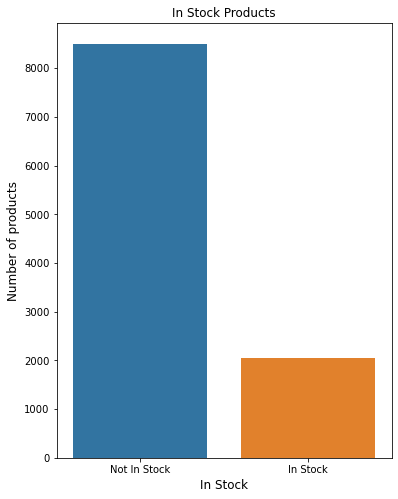

In [25]:
plt.figure(figsize = (6,8))
ax = sns.barplot(data = products.in_stock.value_counts().reset_index(), x= 'index', y = 'in_stock')
plt.xlabel('In Stock', fontsize = 12)
plt.ylabel('Number of products', fontsize =12)
plt.title('In Stock Products')
ax.set_xticklabels(['Not In Stock', 'In Stock'])

In [26]:
products.in_stock.value_counts().reset_index()

,index,in_stock
0,0,8503
1,1,2054


In [27]:
products['brand_short'] = products['sku'].str[:3]

In [28]:
products.brand_short.value_counts().reset_index() # There are 248 brands while there are only 187 brands in brands table

,index,brand_short
0,APP,1783
1,PAC,1589
2,OWC,356
3,AP2,349
4,REP,235
...,...,...
243,TRC,1
244,MTF,1
245,DIR,1
246,KOU,1


Text(0.5, 1.0, 'Distribution of number of products each brand provided')

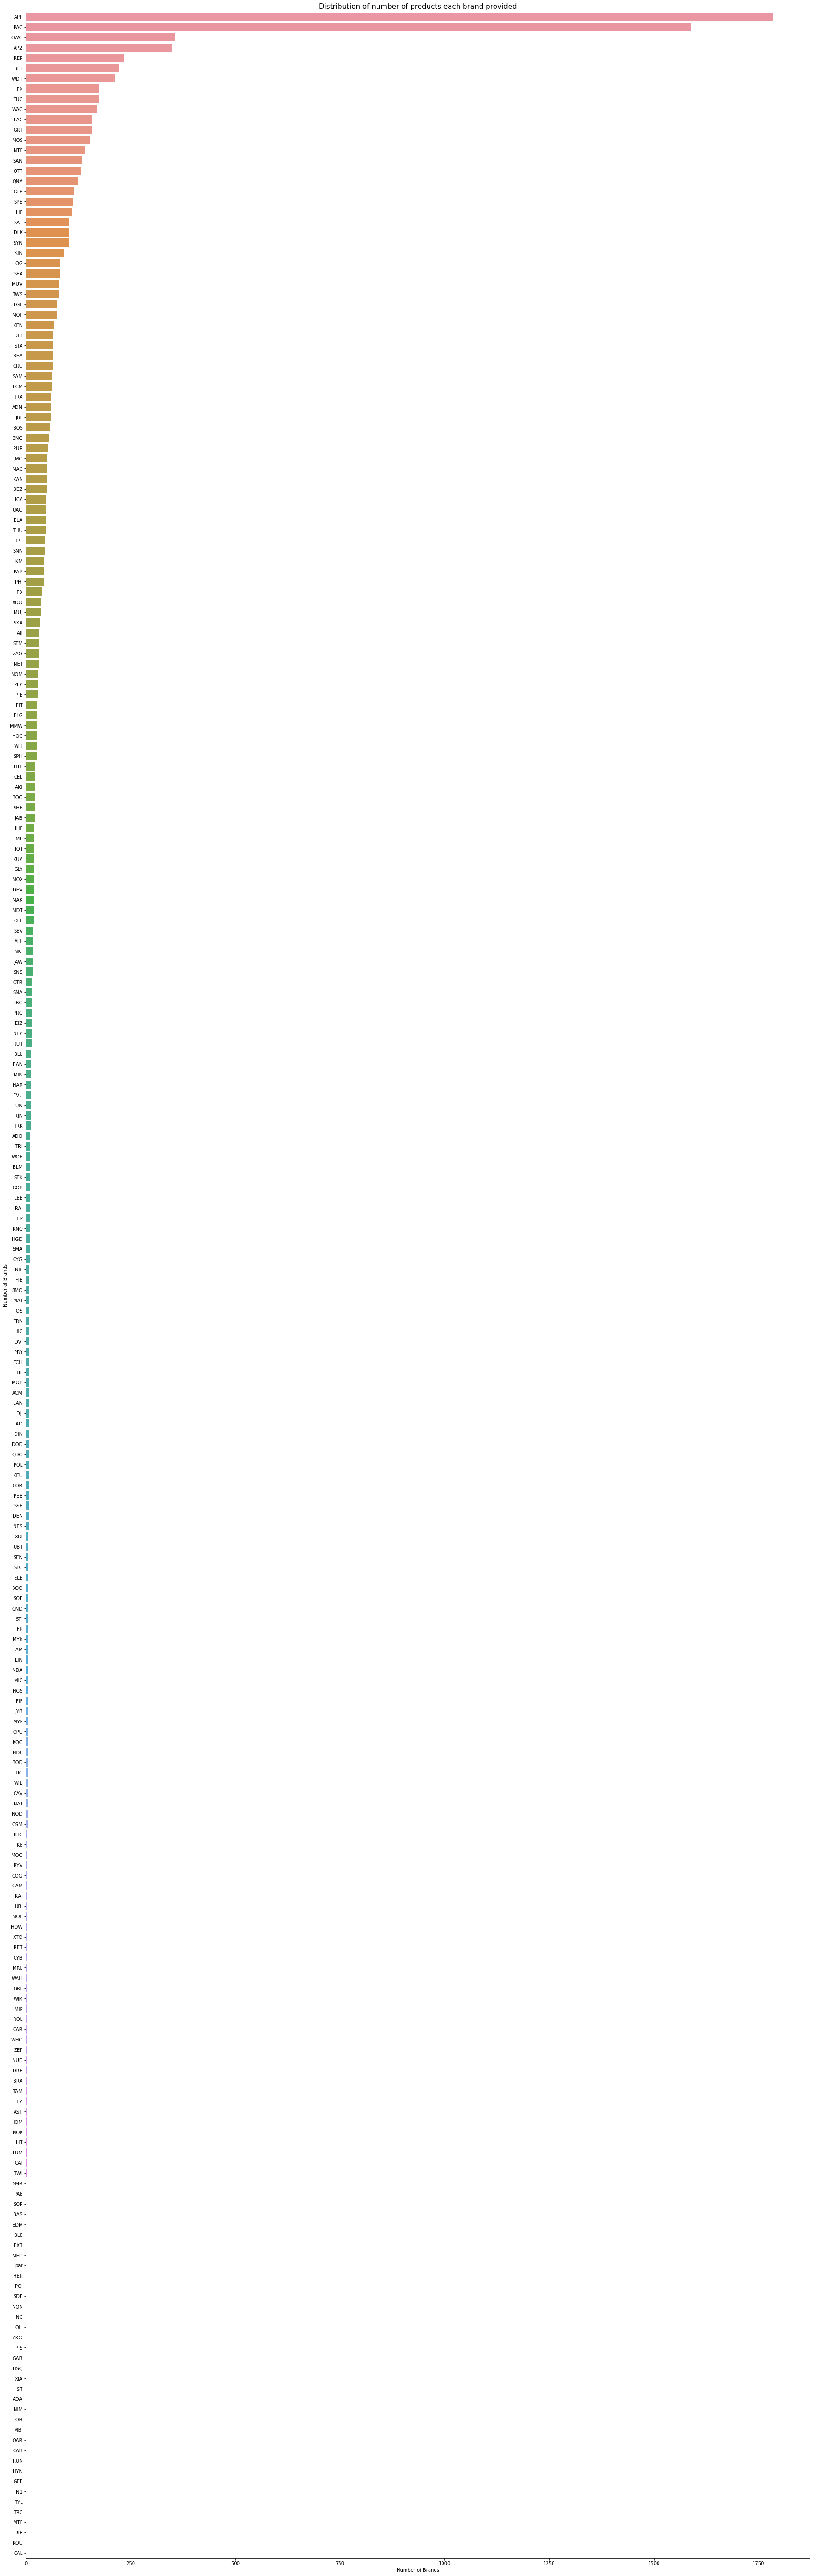

In [29]:
count_brand = products.brand_short.value_counts().reset_index()
plt.figure(figsize = (30,100))
sns.barplot(data = count_brand.query('brand_short>=0'), y = 'index', x = 'brand_short')
plt.xlabel('Number of Brands', fontsize = 10)
plt.ylabel('Number of Brands', fontsize = 10)
plt.title('Distribution of number of products each brand provided', fontsize = 15)

In [30]:
pd.set_option('display.max_rows', 100)
pd.set_option("display.max_colwidth", 100)

In [31]:
products.type.unique()

array(['1515', '11865403', '8696', '14365395', '11905404', '5720',
       '12635403', '12645406', '5384', '57445397', '1325', '14305406',
       '101781405', '1229', '5407', '1298', '21485407', '12755395',
       '21535407', '12585395', '5406', '12655397', '1216', 'Other Type',
       '11935397', '13005399', '1334', '13555403', '1230', '54085407',
       '2425', '13615399', '1404', '12285400', '12085400', '1364',
       '14035403', '5395', '1387', '5399', '12995397', '9094', '54864259',
       '12355400', '2434', '13855401', '24215399', '5403', '5405',
       '20642062', '13835403', '5398', '1433', '10230', '15435404',
       '1231', '1424', '51601716', '42945397', '1,44E+11', '12282',
       '2449', '1392', '13955395', '12215397', '5401', '1416', '11821715',
       '11434', '1276', '12575403', '11859', '5,49E+11', '12051714',
       '10142', '54025401', '4259', '1405', '1375', '5404', '12175397',
       '1296', '113464259', '1,46E+11', '1280', '79201715', '13621714',
       '24885185'

In [32]:
len(products.brand_short.unique())

248

In [33]:
from wordcloud import WordCloud
from collections import Counter

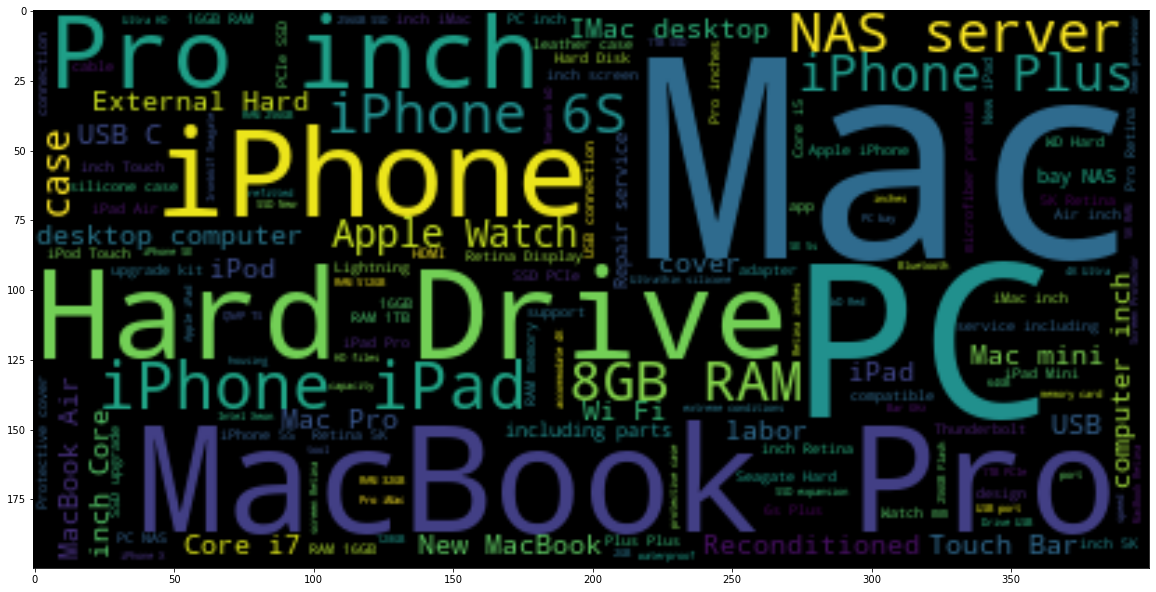

In [34]:
plt.figure(figsize = (20,20))
wordcloud = WordCloud().generate(" ".join(products["desc"]))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [35]:
orderlines[orderlines.sku.isin(products.sku) == False]

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,year,month_num,week_year,month,month_year


# Distribution of differences between total_paid and total_price

In [36]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [37]:
order_merge_price = orderlines.groupby('id_order').agg({'total_price':'sum'}).reset_index().merge(orders, how = 'inner', left_on = 'id_order', right_on = 'order_id') # Merge to get total_price from orderlines table

In [38]:
order_merge_price['price_diff'] = order_merge_price['total_paid'] - order_merge_price['total_price']

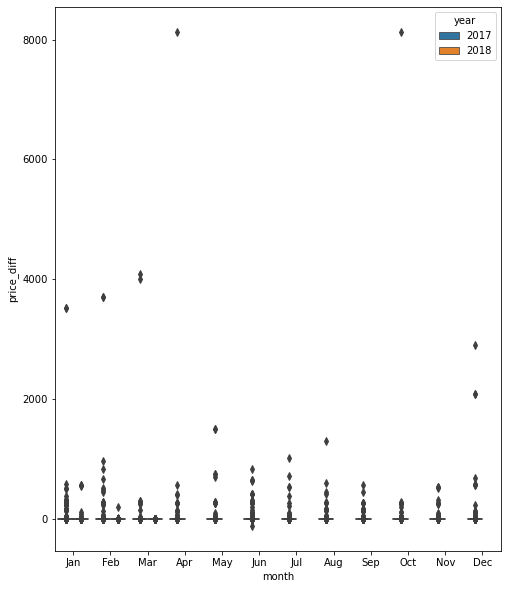

In [39]:
plt.figure(figsize = (8,10))
ax = sns.boxplot(data = order_merge_price, x = 'month', y = 'price_diff', hue = 'year', order = months)

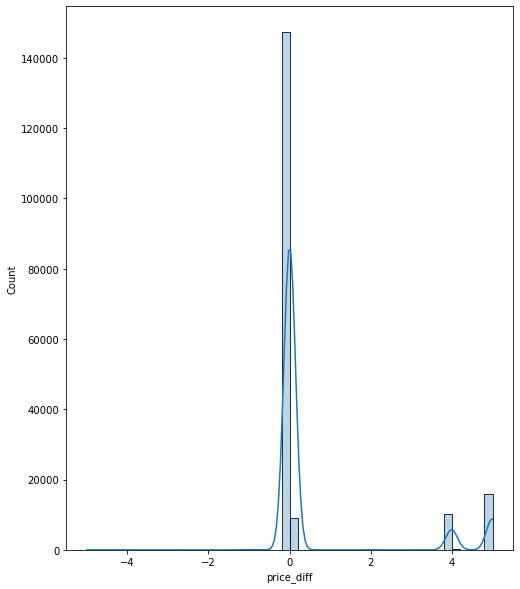

In [40]:
plt.figure(figsize = (8,10))
ax = sns.histplot(data = order_merge_price[(order_merge_price.price_diff < 5) & (order_merge_price.price_diff > -5)], x = 'price_diff', #hue = 'year',
                 alpha=.3, # add transparency to you chart
                 kde=True, # add a density line in the histogram
                 bins=50 # define the number of bins the variable total paid will be grouped
                )

In [41]:
order_merge_price.sort_values(by = 'price_diff', ascending = False).head(20)

,id_order,total_price,order_id,created_date,total_paid,state,check_orders,year,month_num,week_year,month,month_year,price_diff
91540,410591,79697.20,410591,2017-10-09 18:26:59,87825.33,Shopping Basket,True,2017,10,41,Oct,2017-10,8128.13
41135,349364,89122.04,349364,2017-04-24 20:27:24,97250.01,Shopping Basket,True,2017,4,17,Apr,2017-04,8127.97
26745,332299,1310.99,332299,2017-03-05 22:31:16,5401.98,Shopping Basket,True,2017,3,9,Mar,2017-03,4090.99
29790,336039,7594.17,336039,2017-03-17 03:37:03,11602.16,Shopping Basket,True,2017,3,11,Mar,2017-03,4007.99
24693,329790,318.23,329790,2017-02-27 14:29:55,4014.22,Cancelled,True,2017,2,9,Feb,2017-02,3695.99
25199,330399,318.23,330399,2017-02-28 16:02:48,4014.22,Pending,True,2017,2,9,Feb,2017-02,3695.99
6174,307102,159.00,307102,2017-01-11 10:24:37,3677.99,Completed,True,2017,1,2,Jan,2017-01,3518.99
14451,317360,399.09,317360,2017-01-30 14:02:14,3918.08,Completed,True,2017,1,5,Jan,2017-01,3518.99
141259,470632,73.94,470632,2017-12-24 17:04:56,2983.17,Completed,True,2017,12,51,Dec,2017-12,2909.23
138075,466543,17.04,466543,2017-12-19 10:53:41,2109.44,Pending,True,2017,12,51,Dec,2017-12,2092.40


In [42]:
order_merge_price.price_diff.describe()

count    183283.000000
mean          1.258222
std          37.859751
min        -119.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        8128.130000
Name: price_diff, dtype: float64

<AxesSubplot:xlabel='month', ylabel='total_paid'>

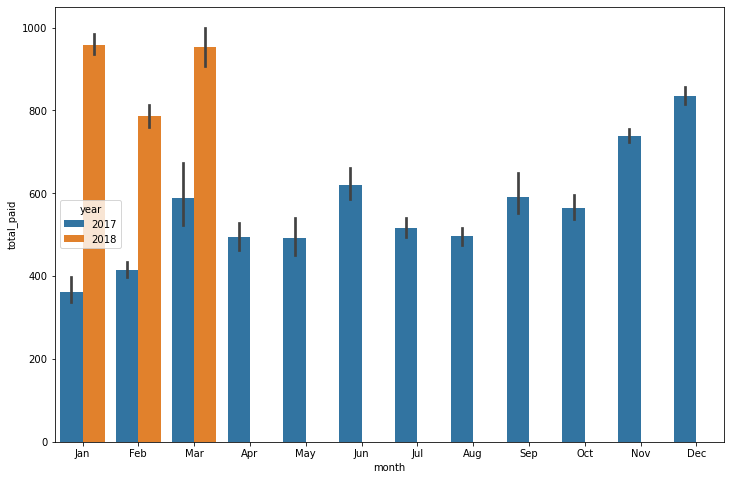

In [43]:
plt.subplots(figsize=(12, 8))
sns.barplot(data = order_merge_price, x='month', y='total_paid', hue='year', order=months)

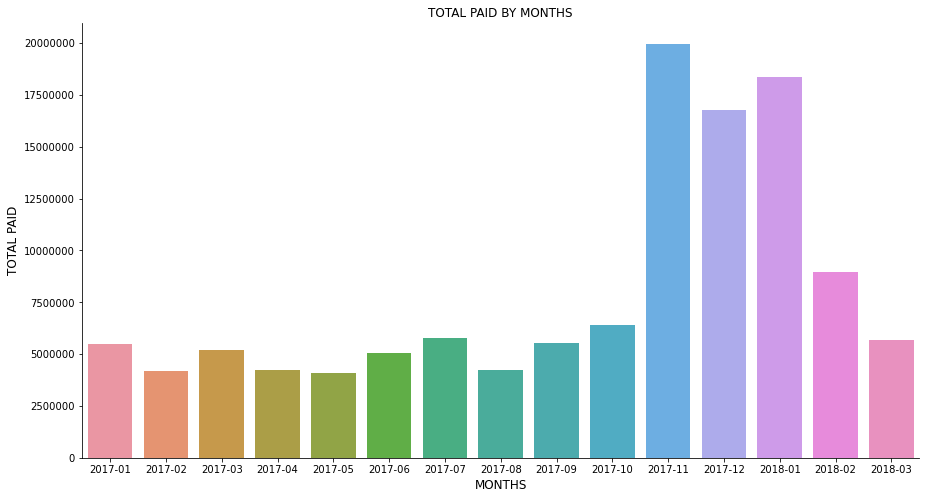

In [44]:
plt.subplots(figsize=(15, 8))
sns.barplot(data = order_merge_price.groupby('month_year').agg({'total_paid': 'sum'}).reset_index(), x = 'month_year', y = 'total_paid')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xlabel('MONTHS', fontsize =12)
plt.ylabel('TOTAL PAID', fontsize =12)
plt.title('TOTAL PAID BY MONTHS')
sns.despine()

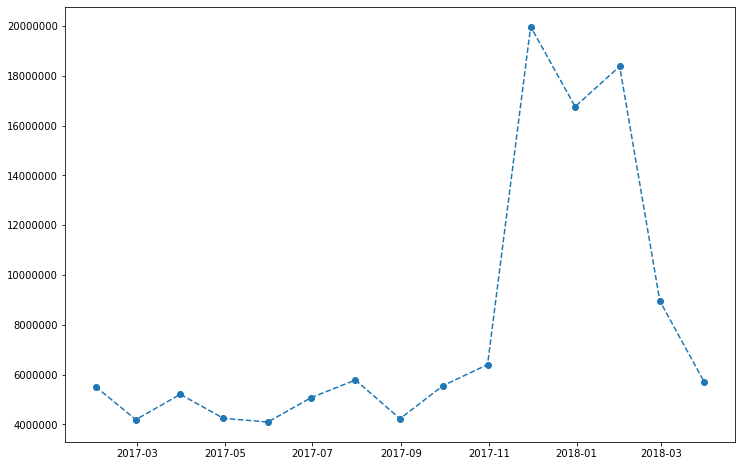

In [45]:
plt.subplots(figsize=(12, 8))
plt.plot_date(data = order_merge_price.groupby('month_year').agg({'total_paid': 'sum'}).reset_index(), x = 'month_year', y = 'total_paid', linestyle='--')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

In [46]:
month_year_df = order_merge_price.groupby('month_year').agg({'total_paid': 'sum'}).reset_index()

In [47]:
order_merge_price.groupby('month_year').agg({'total_paid': 'sum'}).reset_index()

,month_year,total_paid
0,2017-01,5510939.47
1,2017-02,4188193.72
2,2017-03,5205374.47
3,2017-04,4240295.23
4,2017-05,4091589.89
5,2017-06,5068243.85
6,2017-07,5779322.51
7,2017-08,4224617.95
8,2017-09,5553928.30
9,2017-10,6398525.04


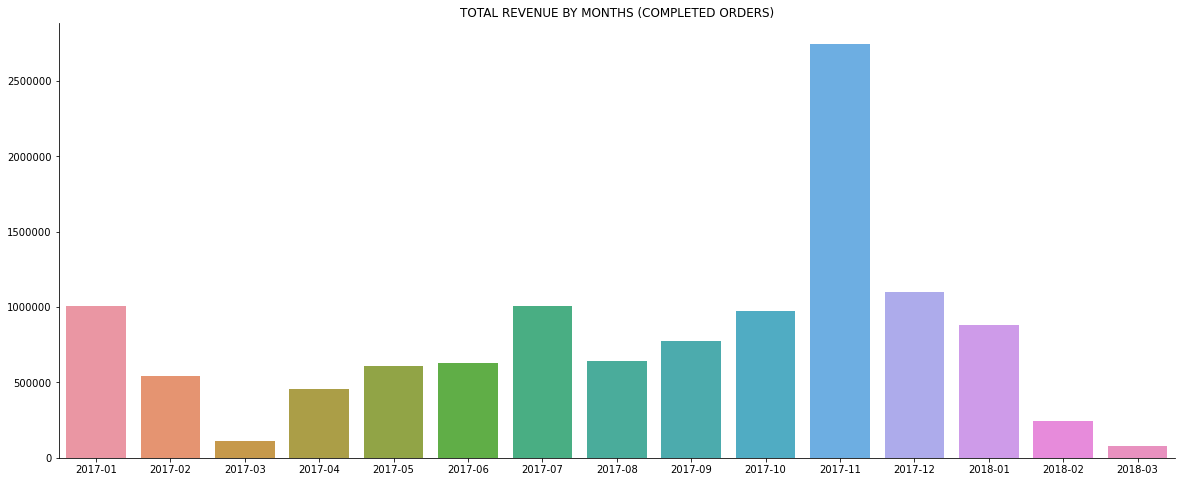

In [48]:
plt.subplots(figsize=(20, 8))
sns.barplot(data = order_merge_price.query('state == "Completed"').groupby('month_year').agg({'total_paid': 'sum'}).reset_index(), x = 'month_year', y = 'total_paid')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xlabel('', fontsize =10)
plt.ylabel('', fontsize =10)
plt.title('TOTAL REVENUE BY MONTHS (COMPLETED ORDERS)')
sns.despine()

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\3782485002.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])


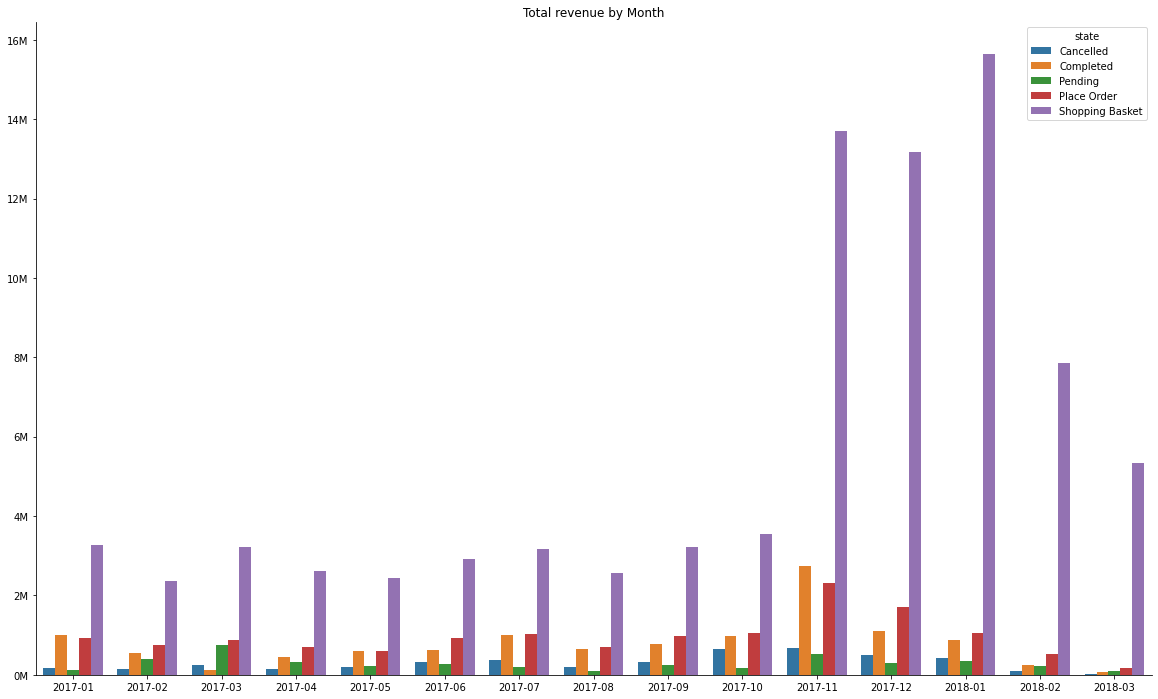

In [49]:
plt.subplots(figsize=(20, 12))
ax = sns.barplot(data = order_merge_price.groupby(['month_year', 'state']).agg({'total_paid': 'sum'}).reset_index(), x = 'month_year', y = 'total_paid', hue = 'state')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xlabel('', fontsize =12)
plt.ylabel('', fontsize =12)
plt.title('Total revenue by Month')
vals = ax.get_yticks()
ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])
sns.despine()

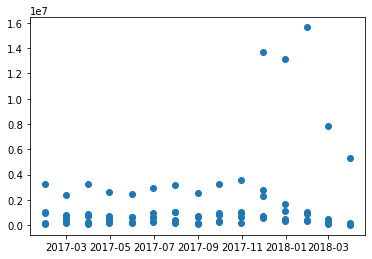

In [50]:
data = order_merge_price.groupby(['month_year', 'state']).agg({'total_paid': 'sum'}).reset_index()
plt.plot_date(data = data, x = 'month_year', y = 'total_paid') # plt has no option hue

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\2788354753.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(val) for val in vals])


Text(0.5, 1.0, 'Orders Conversion Rate')

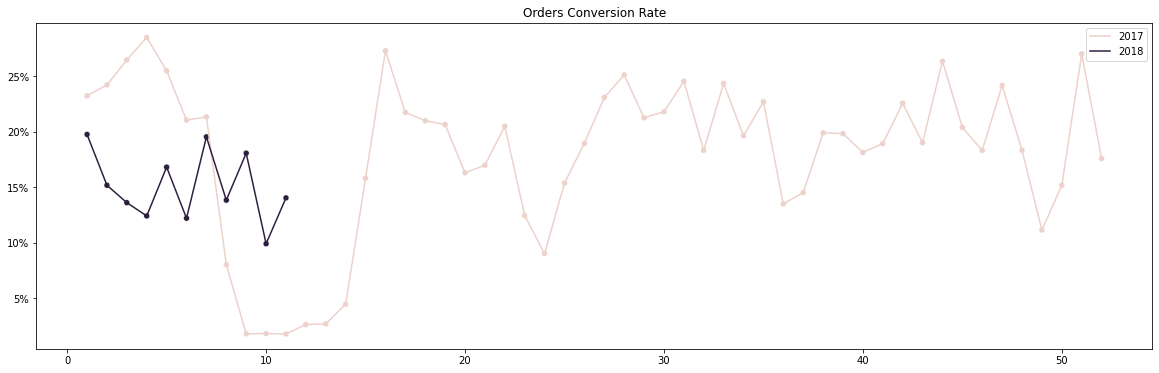

In [51]:
total_orders = order_merge_price[['state','year','week_year']].groupby(['year','week_year']).count()
orders_compl = order_merge_price[['state','year','week_year']].query('state == "Completed"').groupby(['year','week_year']).count()
orders_conversion_rate = orders_compl/total_orders
plt.figure(figsize = (20,6))
ax=sns.scatterplot(
    data = orders_conversion_rate, 
    x='week_year', 
    y='state',
    hue='year', legend = False
    )
sns.lineplot(
    data = orders_conversion_rate, 
    x='week_year', 
    y='state',
    hue='year'
    )
plt.legend(facecolor='white')
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0%}'.format(val) for val in vals])
plt.ylabel('') 
plt.xlabel('') 
plt.title('Orders Conversion Rate')


C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\3782485002.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])


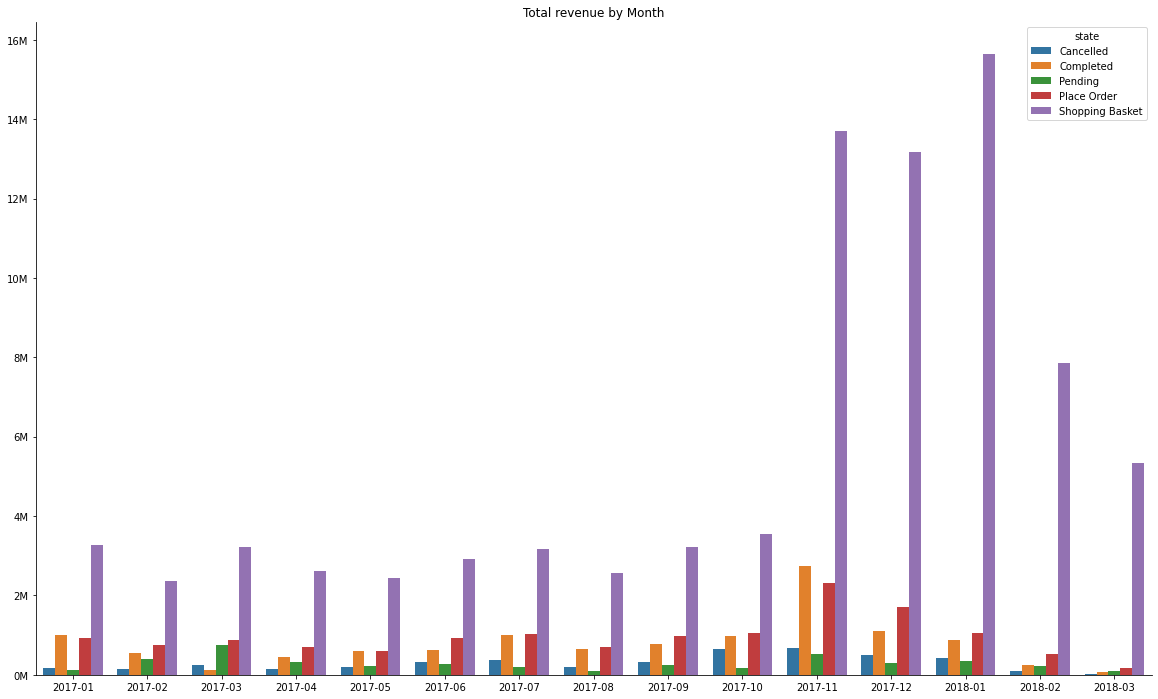

In [52]:
plt.subplots(figsize=(20, 12))
ax = sns.barplot(data = order_merge_price.groupby(['month_year', 'state']).agg({'total_paid': 'sum'}).reset_index(), x = 'month_year', y = 'total_paid', hue = 'state')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xlabel('', fontsize =12)
plt.ylabel('', fontsize =12)
plt.title('Total revenue by Month')
vals = ax.get_yticks()
ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])
sns.despine()

In [53]:
order_merge_price.query('state == "Completed"')

,id_order,total_price,order_id,created_date,total_paid,state,check_orders,year,month_num,week_year,month,month_year,price_diff
1,242832,10.77,242832,2017-12-31 17:40:03,15.76,Completed,True,2017,12,52,Dec,2017-12,4.99
3,245275,149.00,245275,2017-06-28 11:35:37,149.00,Completed,True,2017,6,26,Jun,2017-06,0.00
5,246018,206.96,246018,2017-02-13 23:02:57,211.95,Completed,True,2017,2,7,Feb,2017-02,4.99
6,247524,162.99,247524,2018-01-09 14:21:34,167.98,Completed,True,2018,1,2,Jan,2018-01,4.99
7,247643,153.54,247643,2017-05-26 11:50:35,153.54,Completed,True,2017,5,21,May,2017-05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183028,527042,13.99,527042,2018-03-14 11:47:50,18.98,Completed,True,2018,3,11,Mar,2018-03,4.99
183044,527070,19.98,527070,2018-03-14 11:50:48,24.97,Completed,True,2018,3,11,Mar,2018-03,4.99
183046,527074,19.98,527074,2018-03-14 11:51:42,24.97,Completed,True,2018,3,11,Mar,2018-03,4.99
183063,527096,29.97,527096,2018-03-14 11:58:40,34.96,Completed,True,2018,3,11,Mar,2018-03,4.99


# Orderlines and products tables

In [54]:
# Further data cleaning on one order
orders.loc[orders.order_id == 331780, 'total_paid'] = orders[orders.order_id == 331780]['total_paid']/1000
orderlines.loc[orderlines.id_order == 331780, 'unit_price'] = orderlines[orderlines.id_order == 331780]['unit_price']/1000

In [55]:
orderline_product_merge = orderlines.merge(products[['sku', 'price', 'brand_short']], on = 'sku', how = 'left')

In [56]:
orderline_product_merge['discount_price'] = orderline_product_merge['price'] - orderline_product_merge['unit_price']

In [57]:
orderline_product_merge[orderline_product_merge['discount_price']<-100].sort_values(by = 'discount_price', ascending = False)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,year,month_num,week_year,month,month_year,price,brand_short,discount_price
96975,1323931,392344,0,1,APP1646,739.33,2017-08-24 12:44:57,739.33,True,2017,8,34,Aug,2017-08,639.0,APP,-100.33
96507,1322986,391889,0,1,APP1646,739.33,2017-08-23 11:39:14,739.33,True,2017,8,34,Aug,2017-08,639.0,APP,-100.33
98788,1327615,394026,0,1,APP1646,739.33,2017-08-29 19:31:38,739.33,True,2017,8,35,Aug,2017-08,639.0,APP,-100.33
98769,1327559,394005,0,1,APP1646,739.33,2017-08-29 18:47:45,739.33,True,2017,8,35,Aug,2017-08,639.0,APP,-100.33
99931,1329946,395158,0,1,APP1646,739.33,2017-08-31 18:54:34,739.33,True,2017,8,35,Aug,2017-08,639.0,APP,-100.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50064,1232314,348254,0,1,LAC0219,7349.00,2017-04-21 11:23:28,7349.00,True,2017,4,16,Apr,2017-04,4849.0,LAC,-2500.00
46818,1226269,345307,0,2,LAC0219,7349.00,2017-04-11 10:28:02,14698.00,True,2017,4,15,Apr,2017-04,4849.0,LAC,-2500.00
55016,1241776,352790,0,3,LAC0223,14099.00,2017-05-04 18:59:32,42297.00,True,2017,5,18,May,2017-05,9799.0,LAC,-4300.00
56428,1244301,354084,0,4,LAC0223,14099.00,2017-05-09 09:04:18,56396.00,True,2017,5,19,May,2017-05,9799.0,LAC,-4300.00


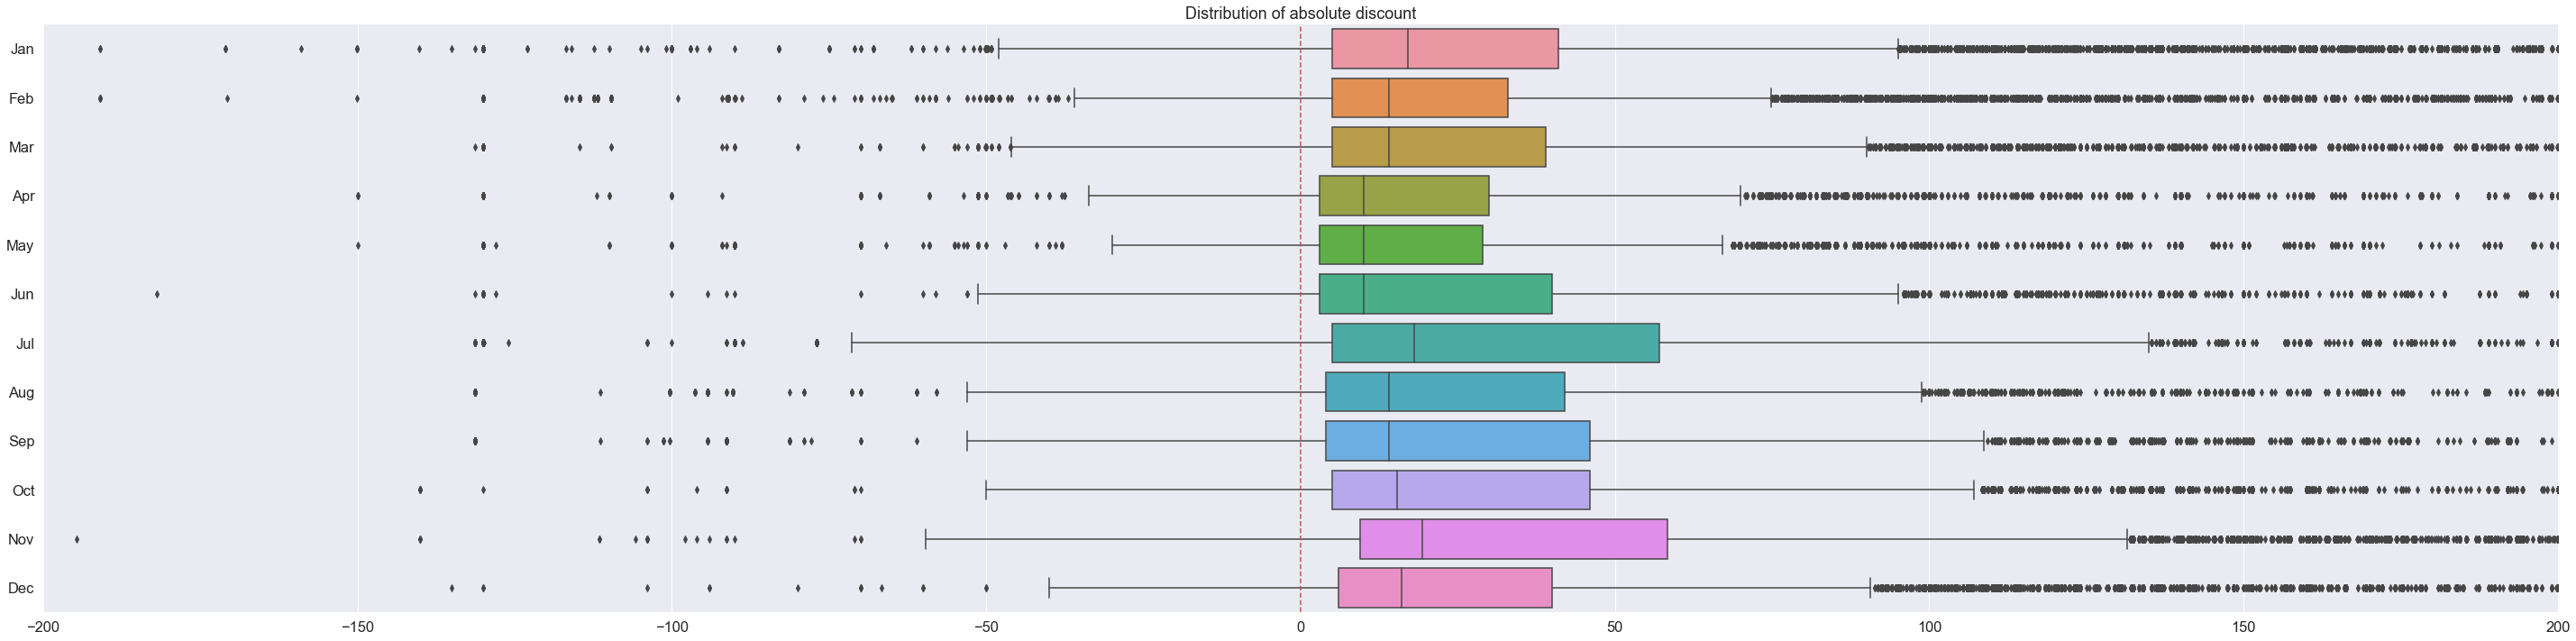

In [58]:
sns.set(font_scale=1.5)
plt.subplots(figsize = (50,12))
ax = sns.boxplot(data = orderline_product_merge, y = 'month', x = 'discount_price', orient = 'h')


plt.axvline(x= 0 , color='r', linestyle='--')

sns.set_style("white")

plt.xlim(-200, 200)
plt.title('Distribution of absolute discount')
plt.xlabel('')
plt.ylabel('')
sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")

In [59]:
orderline_product_merge['discount_percent'] = (orderline_product_merge['price'] - orderline_product_merge['unit_price'])/orderline_product_merge['price']*100

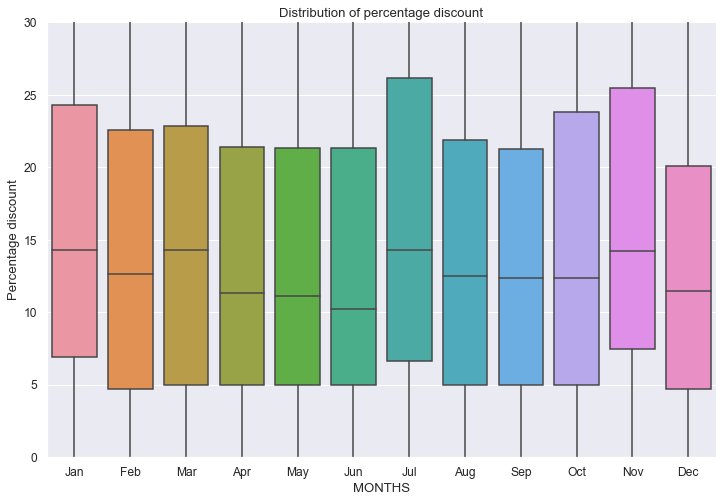

In [60]:
sns.set(font_scale=1.1)
plt.subplots(figsize = (12,8))
ax = sns.boxplot(data = orderline_product_merge, x = 'month', y = 'discount_percent', orient = 'v')


#plt.axvline(x= 0 , color='r', linestyle='--')

sns.set_style("white")
vals = ax.get_yticks()
#ax.set_yticklabels(['{:.0%}'.format(val) for val in vals])
plt.ylim(0, 30)
plt.title('Distribution of percentage discount')
plt.ylabel('Percentage discount')
plt.xlabel('MONTHS')
sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")

In [61]:
orders.state.nunique()

5

In [62]:
orderline_product_merge

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,year,month_num,week_year,month,month_year,price,brand_short,discount_price,discount_percent
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True,2017,1,52,Jan,2017-01,34.99,OTT,16.00,45.727351
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True,2017,1,52,Jan,2017-01,429.00,LGE,30.00,6.993007
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True,2017,1,52,Jan,2017-01,699.00,PAR,224.95,32.181688
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True,2017,1,52,Jan,2017-01,79.00,WDT,10.61,13.430380
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True,2017,1,52,Jan,2017-01,29.90,JBL,6.16,20.602007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264762,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True,2018,3,11,Mar,2018-03,49.95,JBL,6.96,13.933934
264763,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True,2018,3,11,Mar,2018-03,215.98,PAC,74.40,34.447634
264764,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True,2018,3,11,Mar,2018-03,25.00,APP,15.01,60.040000
264765,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True,2018,3,11,Mar,2018-03,29.99,BEZ,10.00,33.344448


In [63]:
p_df = orderline_product_merge[orderline_product_merge.discount_percent > 1].groupby('month_year').agg({'sku':'nunique'}).reset_index()

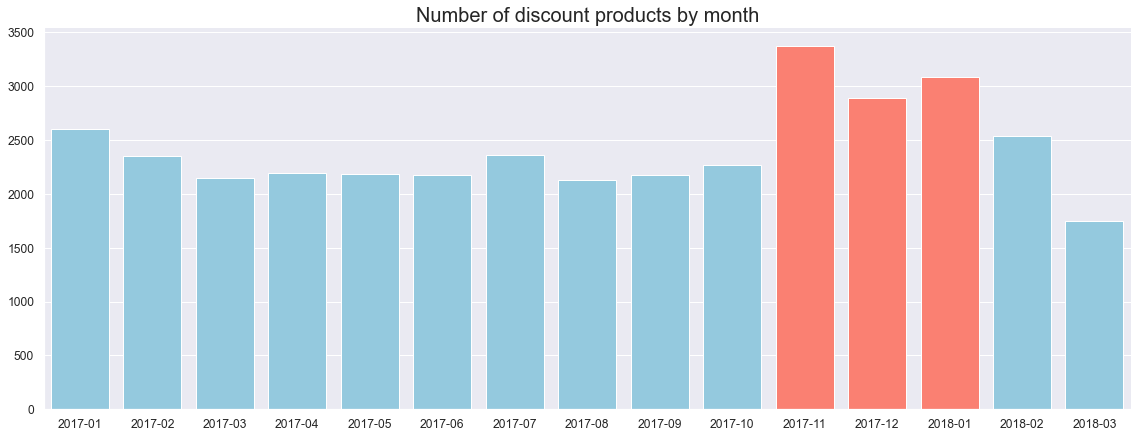

In [64]:
sns.set(font_scale=1.1)
plt.subplots(figsize=(16, 6))
ax = sns.barplot(data = p_df, x = 'month_year', y = 'sku', color = 'skyblue')
ax.patches[10].set_facecolor('salmon')
ax.patches[11].set_facecolor('salmon')
ax.patches[12].set_facecolor('salmon')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xlabel('', fontsize =12)
plt.ylabel('', fontsize =12)
plt.tight_layout()
plt.title('Number of discount products by month', fontsize =20)
plt.savefig('Number_discount_product.png')
sns.despine()

In [65]:
p_df = orderline_product_merge[orderline_product_merge.discount_percent > 1].groupby('month_year').agg({'discount_percent':'mean'}).reset_index()

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\4181419377.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val))+'%' for val in vals])


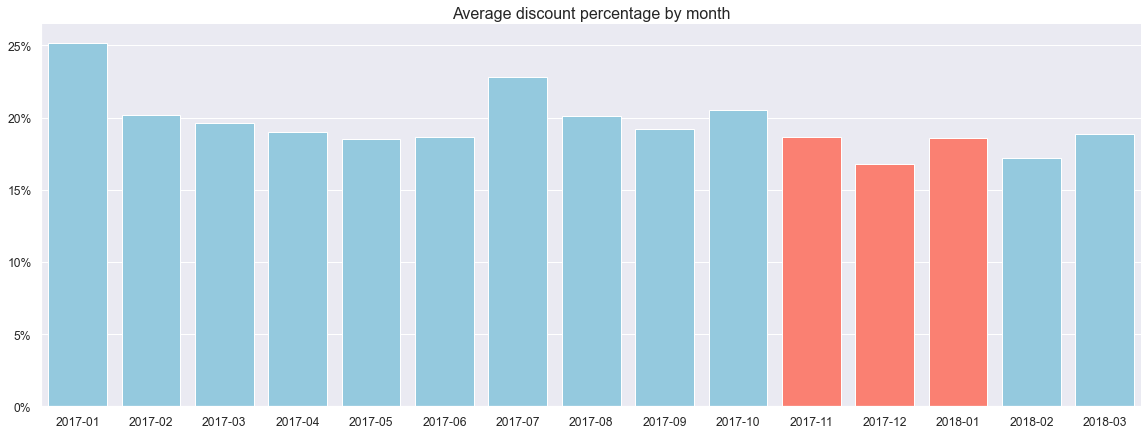

In [66]:
sns.set(font_scale=1.1)
plt.subplots(figsize=(16, 6))
ax = sns.barplot(data = p_df, x = 'month_year', y = 'discount_percent', color = 'skyblue')
ax.patches[10].set_facecolor('salmon')
ax.patches[11].set_facecolor('salmon')
ax.patches[12].set_facecolor('salmon')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xlabel('', fontsize =12)
plt.ylabel('', fontsize =12)
plt.tight_layout()
plt.title('Average discount percentage by month', fontsize =16)
vals = ax.get_yticks()
ax.set_yticklabels([str(int(val))+'%' for val in vals])
sns.despine()
plt.savefig('Average_percentage_discount_by_month.png')

In [67]:
vals

array([ 0.,  5., 10., 15., 20., 25., 30.])

In [68]:
orders.state.nunique()

5

## Compare revenue of discount products vs nondiscount products

In [69]:
orderline_product_order_merge = orderline_product_merge.merge(orders[['order_id', 'state', 'total_paid']], how = 'left', left_on= 'id_order', right_on='order_id') # Merge to orders table to get full table

In [70]:
orderline_product_order_merge['discount_True'] = np.where(orderline_product_order_merge.discount_percent > 2, 1, 0)

In [71]:
orderline_product_order_merge.discount_True.value_counts()

1    228173
0     36594
Name: discount_True, dtype: int64

In [72]:
orderline_product_order_merge[orderline_product_order_merge.state == 'Completed'].discount_True.value_counts()

1    39578
0     4461
Name: discount_True, dtype: int64

D:\Anacoda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


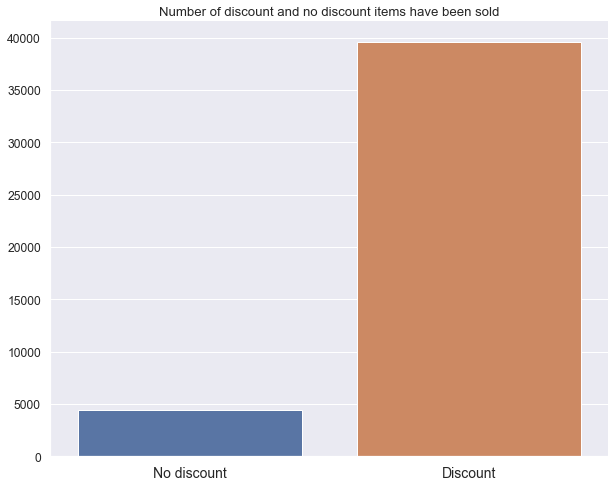

In [73]:
plt.figure(figsize = (10, 8))
ax = sns.countplot(orderline_product_order_merge[orderline_product_order_merge.state == 'Completed'].discount_True)
ax.set_xticklabels(['No discount', 'Discount'], fontsize = 14)
plt.xlabel('')
plt.ylabel('')
plt.title('Number of discount and no discount items have been sold')
sns.despine()
plt.savefig('Number_product_with_discount.png')

In [74]:
orderline_product_order_merge[orderline_product_order_merge.state == 'Completed'].groupby('discount_True').agg({'total_paid': 'sum'}).reset_index()

,discount_True,total_paid
0,0,2177983.17
1,1,16408215.17


C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\114752487.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])


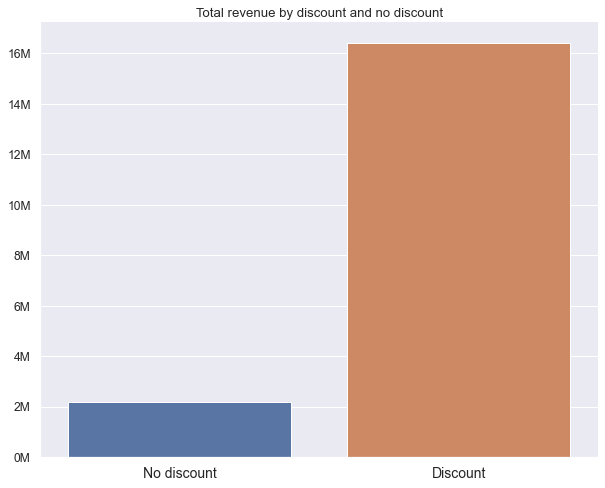

In [75]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(data = orderline_product_order_merge[orderline_product_order_merge.state == 'Completed'].groupby('discount_True').agg({'total_paid': 'sum'}).reset_index(), x='discount_True', y = 'total_paid')
ax.set_xticklabels(['No discount', 'Discount'], fontsize = 14)
plt.xlabel('')
plt.ylabel('')
plt.title('Total revenue by discount and no discount')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
sns.despine()
vals = ax.get_yticks()
ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])
plt.savefig('Total_revenue_with_discount.png')

In [76]:
orderline_product_order_merge[orderline_product_order_merge.state == 'Completed'].groupby(['month_year', 'discount_True']).agg({'total_paid':'sum'}).reset_index()

,month_year,discount_True,total_paid
0,2017-01,0,221455.74
1,2017-01,1,1339770.18
2,2017-02,0,93802.72
3,2017-02,1,706937.15
4,2017-03,0,29189.55
5,2017-03,1,198368.53
6,2017-04,0,112871.27
7,2017-04,1,674861.49
8,2017-05,0,155697.41
9,2017-05,1,812943.03


C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\1062303242.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])


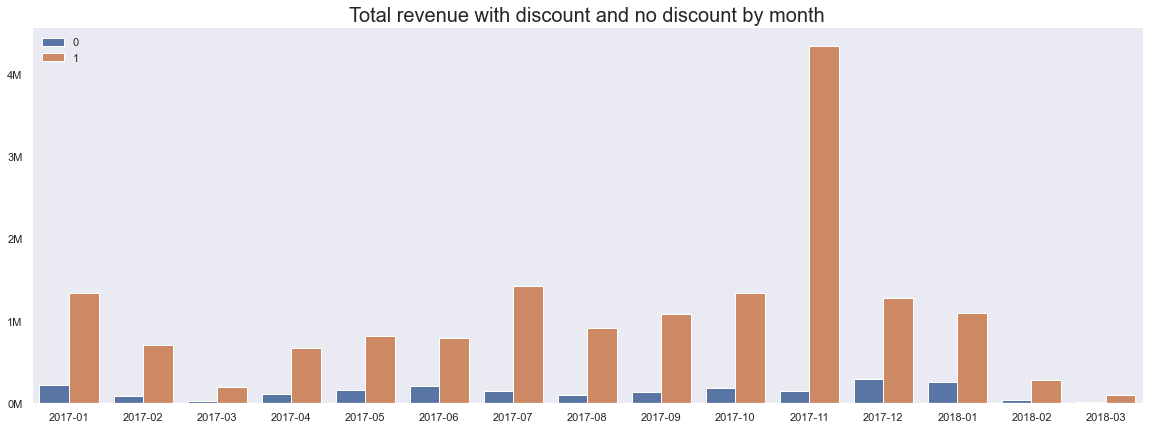

In [186]:
plt.figure(figsize = (16, 6))
ax = sns.barplot(data=orderline_product_order_merge[orderline_product_order_merge.state == 'Completed'].groupby(['month_year', 'discount_True']).agg({'total_paid':'sum'}).reset_index(), \
                 x='month_year', y='total_paid', hue='discount_True')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
sns.set_theme(style='dark')
plt.title('Total revenue with discount and no discount by month', fontsize =20 )
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
#plt.legend(['No Discount', 'Discount'])
plt.legend(loc='upper left', frameon=False)#, labels=['No Discount', 'Discount'])
#plt.legend(['No Discount', 'Discount'])
vals = ax.get_yticks()
ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])
sns.despine()
plt.savefig('Revenue_with_discount_by_month.png')

# Analyse the revenue by brand_shortname

In [78]:
orderline_product_order_merge_compl = orderline_product_order_merge[orderline_product_order_merge.state=='Completed']

In [79]:
orderline_product_order_merge_compl.groupby('brand_short').agg({'total_paid': 'sum'}).reset_index().sort_values(by='total_paid', ascending = False).total_paid.sum()

18586198.339999996

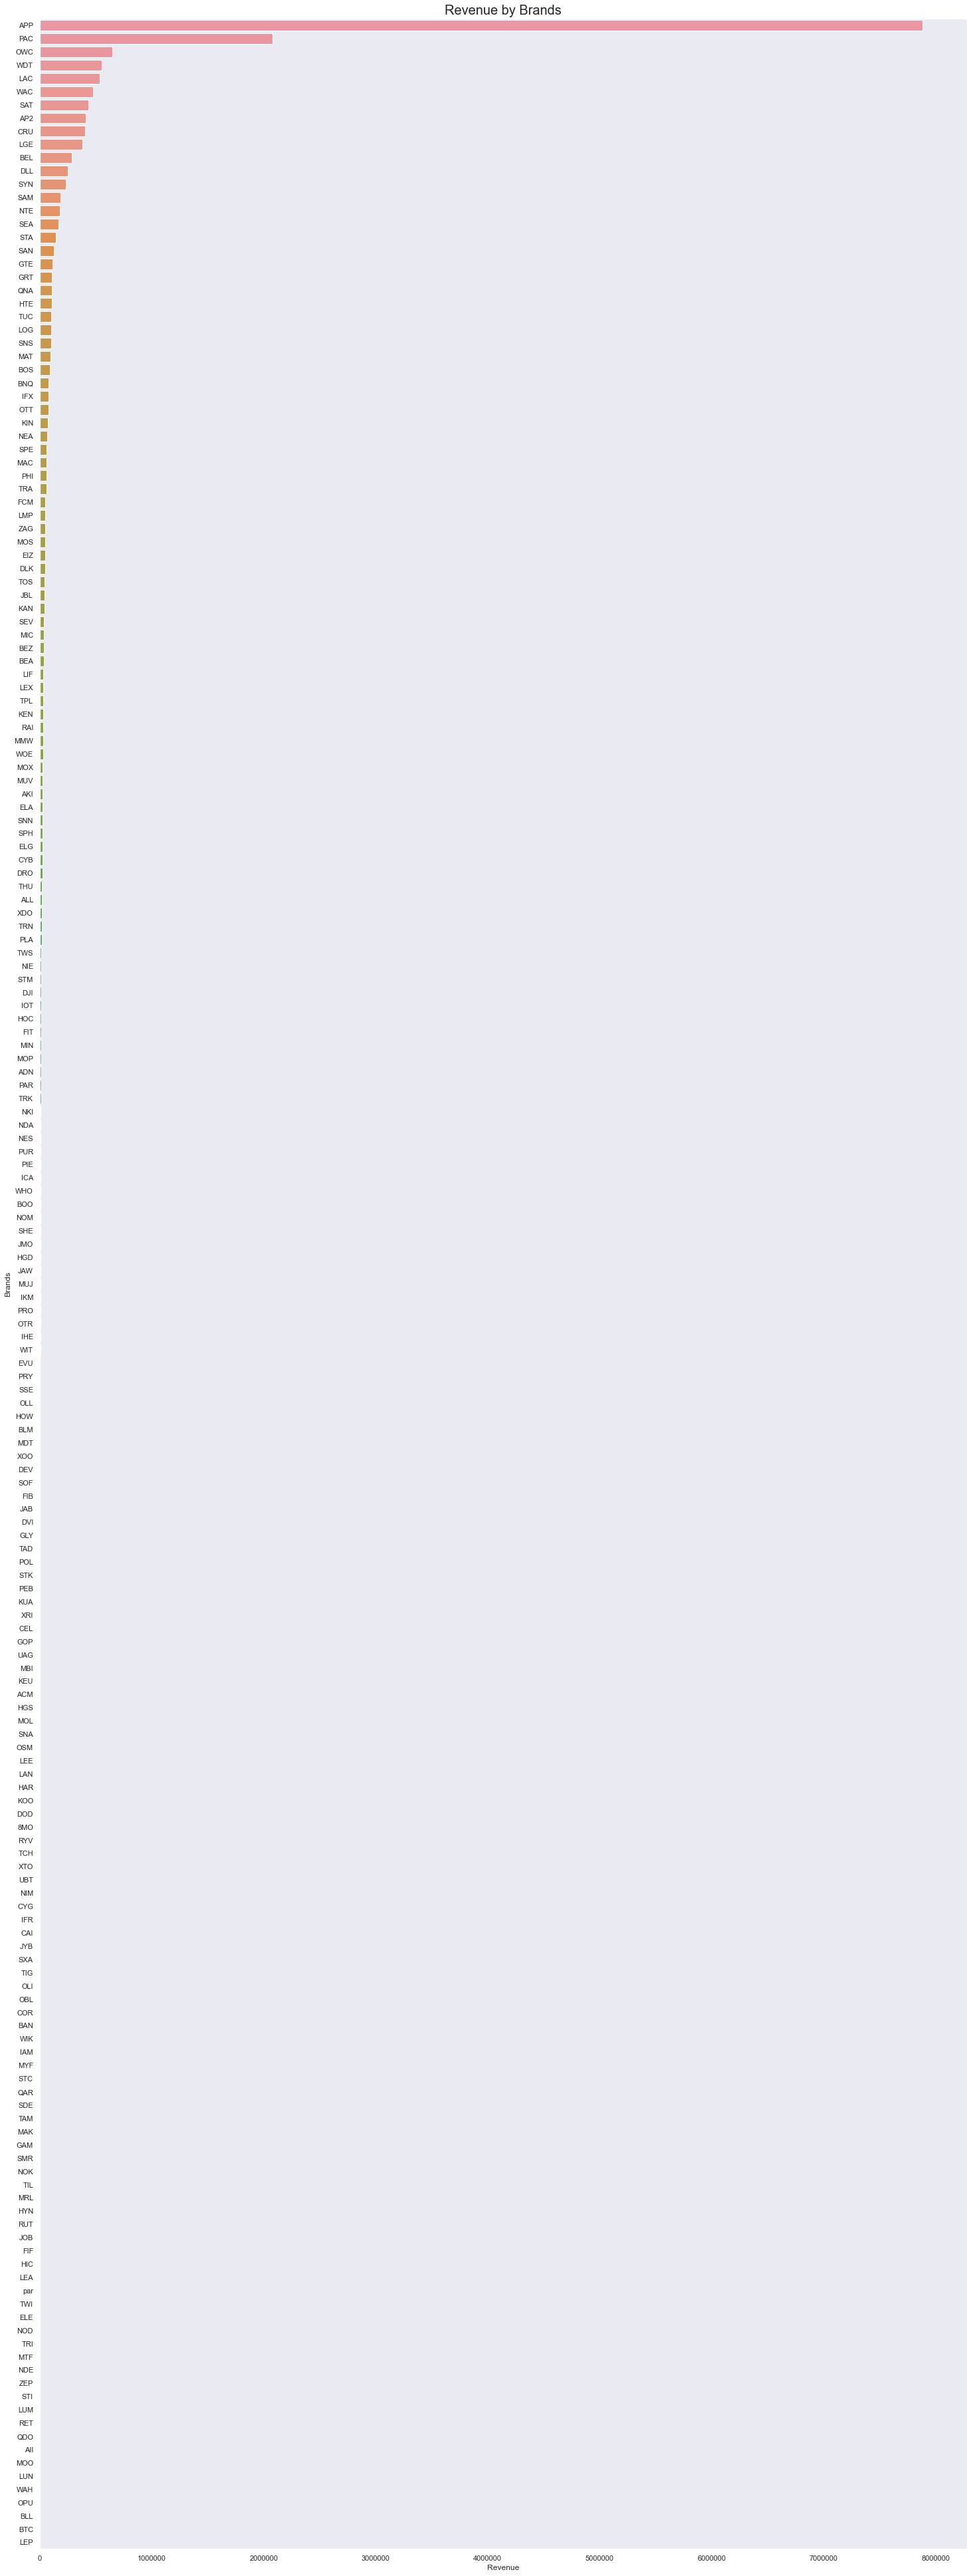

In [80]:
plt.figure(figsize=(25, 70))
ax = sns.barplot(data = orderline_product_order_merge_compl.groupby('brand_short').agg({'total_paid': 'sum'}).reset_index().sort_values(by='total_paid', ascending = False), x='total_paid', y='brand_short')
plt.xlabel('Revenue')
plt.ylabel('Brands')
plt.title('Revenue by Brands', fontsize = 20)
plt.ticklabel_format(style='plain', axis='x') # remove scientific notation for the y axis


In [81]:
len(orderline_product_order_merge_compl.groupby('brand_short').agg({'total_paid': 'sum'}).reset_index().sort_values(by='total_paid', ascending = False).query('total_paid > 200000')) # There are only 13 brands with total revenue >200.000

13

In [82]:
p_df = orderline_product_order_merge_compl.groupby('brand_short').agg({'total_paid': 'sum'}).reset_index().sort_values(by='total_paid', ascending = False).query('total_paid > 200000')
p_df.total_paid.sum()

14599918.769999998

In [83]:
p_df = p_df.merge(brands, how = 'left', left_on = 'brand_short', right_on='short')

In [84]:
p_df.loc[p_df['short']=='AP2', 'long'] = 'Apple2'

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\402812933.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])


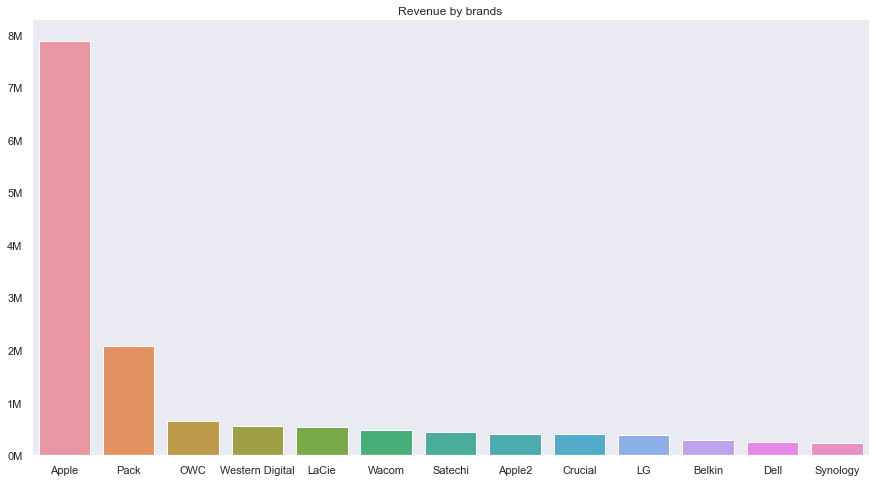

In [193]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=p_df, x='long', y='total_paid')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xlabel('')
plt.ylabel('')
plt.title('Revenue by brands')
vals = ax.get_yticks()
ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])
sns.despine()
plt.savefig('Revenue_by_brand.png')

In [86]:
orderline_product_order_merge_compl['date_series'] = pd.to_datetime(orderline_product_order_merge_compl['date'].dt.date)

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\450948586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderline_product_order_merge_compl['date_series'] = pd.to_datetime(orderline_product_order_merge_compl['date'].dt.date)


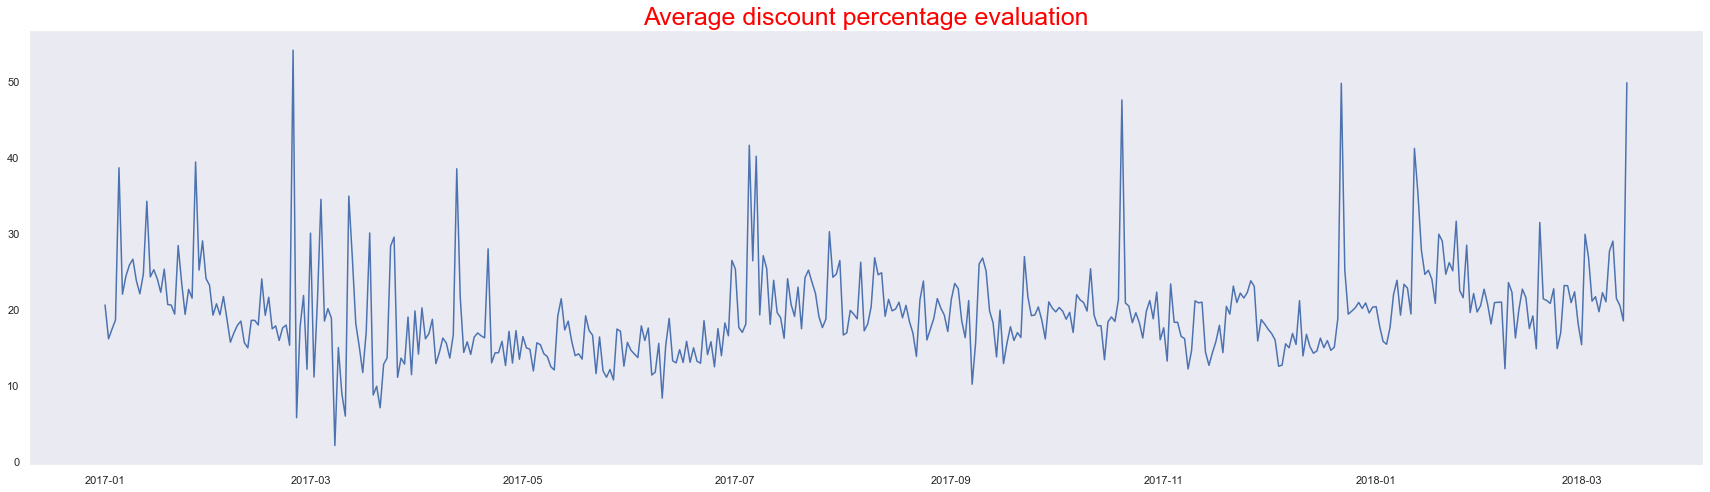

In [87]:
plt.figure(figsize=(30,8))
plt.plot(orderline_product_order_merge_compl.groupby('date_series').agg({'discount_percent':'mean'}))
plt.title('Average discount percentage evaluation', fontsize =25 , color = 'red')
plt.savefig('Average_discount_percentage_evaluation.png')

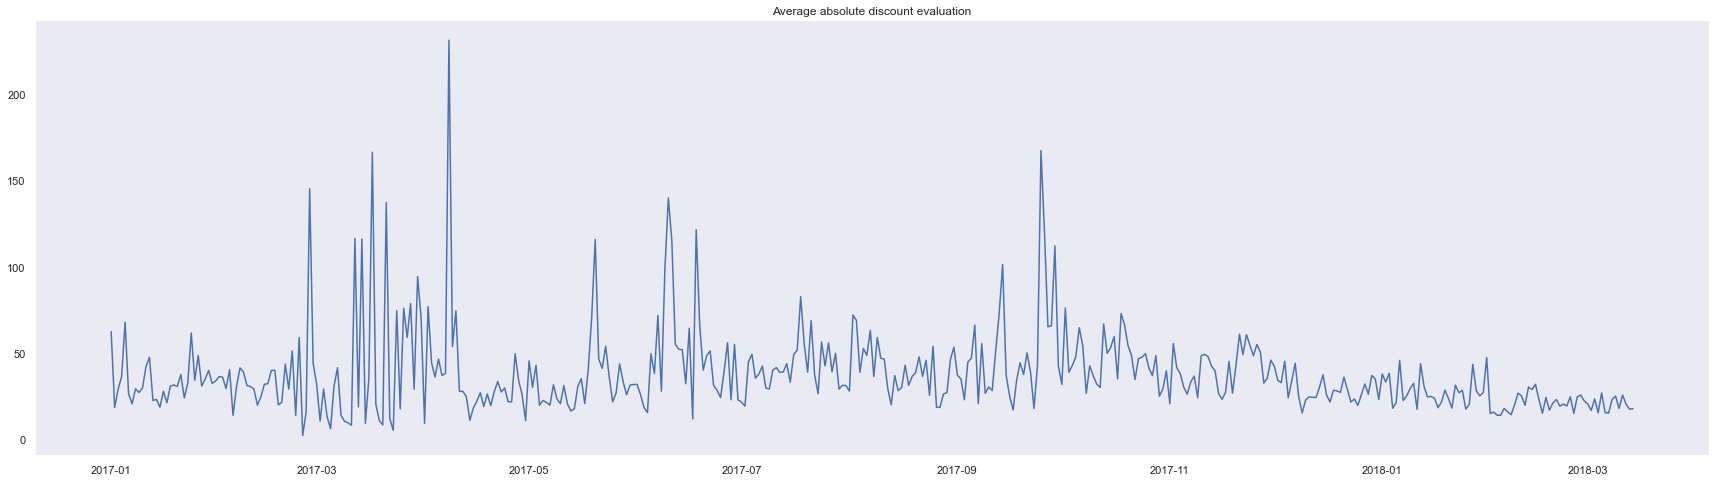

In [88]:
plt.figure(figsize=(30,8))
plt.plot(orderline_product_order_merge_compl.groupby('date_series').agg({'discount_price':'mean'}))
plt.title('Average absolute discount evaluation')
plt.savefig('Average_absolute_discount_evaluation.png')

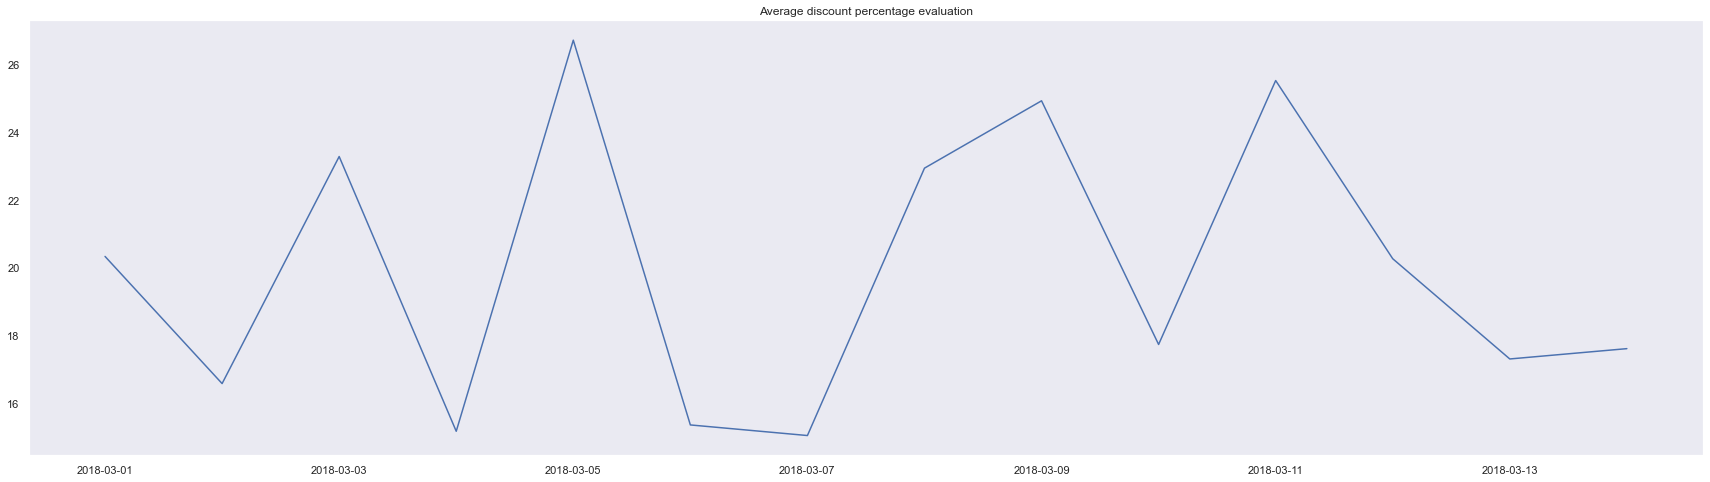

In [89]:
plt.figure(figsize=(30,8))
plt.plot(orderline_product_order_merge_compl[(orderline_product_order_merge_compl.month_num ==3)&(orderline_product_order_merge_compl.year ==2018)].groupby('date_series').agg({'discount_price':'mean'}))
plt.title('Average discount percentage evaluation')
plt.savefig('Average_discount_percentage_evaluation.png')

In [90]:
orders.state.nunique()

5

In [91]:
orderline_product_order_merge_compl

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,year,...,month_year,price,brand_short,discount_price,discount_percent,order_id,state,total_paid,discount_True,date_series
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,True,2017,...,2017-01,60.99,OWC,13.50,22.134776,299545,Completed,51.48,1,2017-01-01
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,True,2017,...,2017-01,22.95,IOT,3.96,17.254902,299546,Completed,18.99,1,2017-01-01
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,True,2017,...,2017-01,89.00,APP,16.81,18.887640,295347,Completed,72.19,1,2017-01-01
10,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99,True,2017,...,2017-01,3209.00,PAC,643.01,20.037706,299549,Completed,2565.99,1,2017-01-01
16,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,True,2017,...,2017-01,76.99,CRU,16.09,20.898818,299556,Completed,65.89,1,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264430,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99,True,2018,...,2018-03,25.00,APP,15.01,60.040000,527035,Completed,37.98,1,2018-03-14
264450,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98,True,2018,...,2018-03,25.00,APP,15.01,60.040000,527070,Completed,24.97,1,2018-03-14
264454,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98,True,2018,...,2018-03,25.00,APP,15.01,60.040000,527074,Completed,24.97,1,2018-03-14
264474,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97,True,2018,...,2018-03,25.00,APP,15.01,60.040000,527096,Completed,34.96,1,2018-03-14


In [92]:
orderline_product_order_merge_compl.groupby('date_series').agg({'discount_price': 'sum'}).reset_index()

,date_series,discount_price
0,2017-01-01,5668.02
1,2017-01-02,6124.47
2,2017-01-03,8309.89
3,2017-01-04,3734.65
4,2017-01-05,8123.94
...,...,...
433,2018-03-10,549.62
434,2018-03-11,1071.94
435,2018-03-12,1600.63
436,2018-03-13,882.38


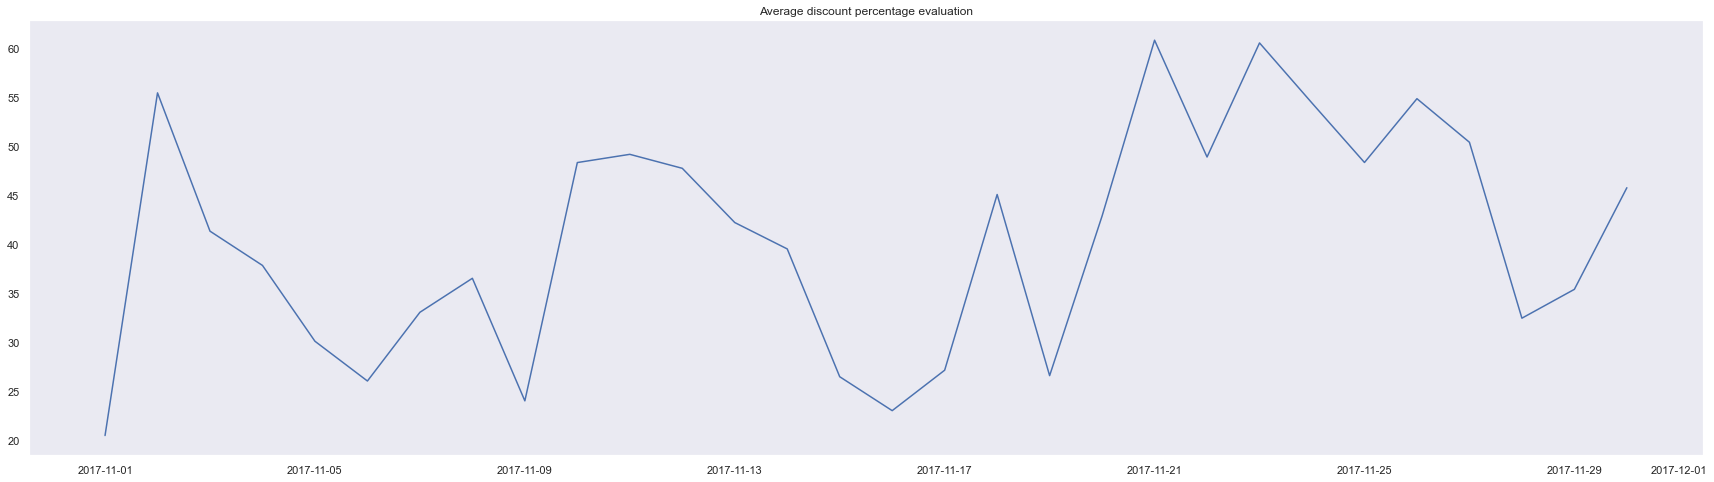

In [93]:
plt.figure(figsize=(30,8))
plt.plot(orderline_product_order_merge_compl[(orderline_product_order_merge_compl.month_num ==11)&(orderline_product_order_merge_compl.year ==2017)].groupby('date_series').agg({'discount_price': 'mean'}))
plt.title('Average discount percentage evaluation')
plt.savefig('Average_discount_percentage_evaluation.png')

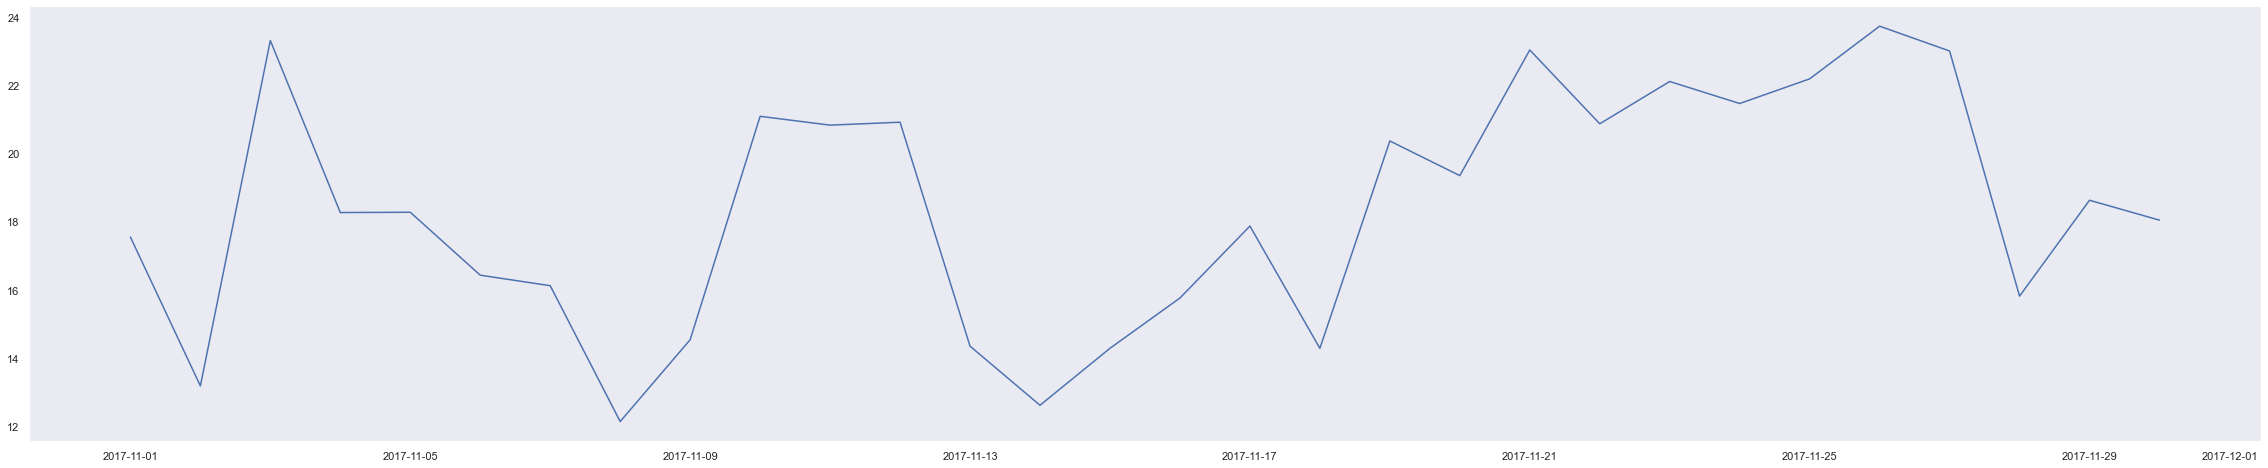

In [94]:
plt.figure(figsize=(40,8))
plt.plot(orderline_product_order_merge_compl[(orderline_product_order_merge_compl.month_num ==11)&(orderline_product_order_merge_compl.year ==2017)].groupby('date_series').agg({'discount_percent':'mean'}))


In [95]:
orderline_product_order_merge_compl.month_num

6         1
7         1
8         1
10        1
16        1
         ..
264430    3
264450    3
264454    3
264474    3
264489    3
Name: month_num, Length: 44039, dtype: int64

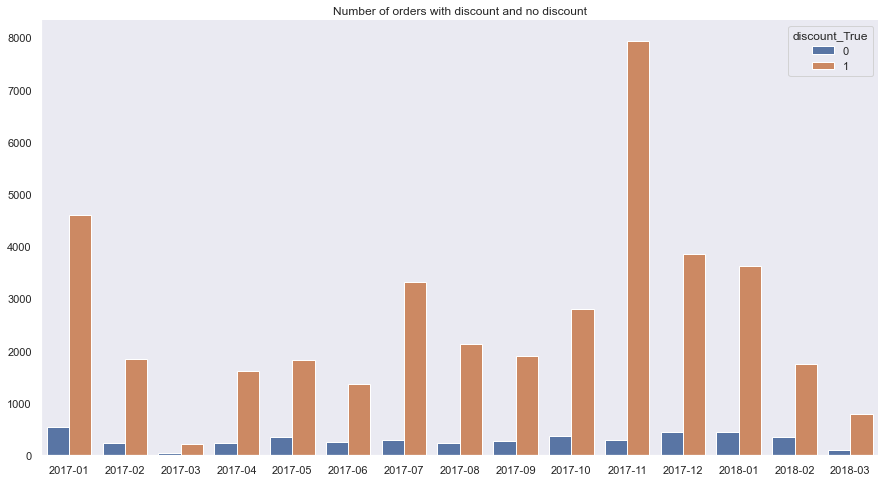

In [96]:
# ax = sns.barplot(data = orderline_product_order_merge_compl, x= 'month')
plt.figure(figsize = (15,8))
ax = sns.barplot(data = orderline_product_order_merge_compl.groupby(['month_year', 'discount_True']).id_order.count().reset_index(), x = 'month_year', y='id_order', hue = 'discount_True')
plt.xlabel('')
plt.ylabel('')
plt.title('Number of orders with discount and no discount')
sns.despine()
plt.savefig('Number_orders_with_discount.png')

In [97]:
month_10_2017 = orderline_product_order_merge_compl[(orderline_product_order_merge_compl.year==2017)&(orderline_product_order_merge_compl.month_num == 10)]
month_11_2017 = orderline_product_order_merge_compl[(orderline_product_order_merge_compl.year==2017)&(orderline_product_order_merge_compl.month_num == 11)]

In [98]:
month_11_2017[(month_11_2017.discount_True == 1)&(month_11_2017.sku.isin(month_10_2017.sku)==False)].total_paid.sum() # Total revenue generated by discount products which have not seen in October

1524815.9699999997

In [99]:
orderline_product_order_merge_compl[(orderline_product_order_merge_compl.year==2017)&(orderline_product_order_merge_compl.month_num == 10)].total_paid.sum() # Total revenue generated in October

1528905.98

In [100]:
month_11_2017[(month_11_2017.discount_True == 1)&(month_11_2017.sku.isin(month_10_2017.sku)==True)].total_paid.sum()

2823665.78

In [101]:
month_11_2017.total_paid.sum()

4502332.389999999

# Create catergories for products

In [102]:
products_cl = products.copy()
products_cl["namedesc"] = products_cl.name + products_cl.desc

products_cl.loc[(products_cl.namedesc.str.contains("[Kk]eybord", regex=True))|(products_cl.namedesc.str.contains("[Mm]ouse", regex=True)), "category"] = "Computer Accessories"
products_cl.loc[(products_cl.namedesc.str.contains("[Aa]dapter", regex=True))|(products_cl.namedesc.str.contains("[Cc]able", regex=True))
              |(products_cl.namedesc.str.contains("[Ff]lash", regex=True)), "category"] = "Adapter/Cable/MemoryCard"
products_cl.loc[(products_cl.namedesc.str.contains("[Mm]acbook", regex=True))|(products_cl.namedesc.str.contains("[Nn]otebook", regex=True))|(products_cl.namedesc.str.contains("[Ll]aptop", regex=True))
              |(products_cl.namedesc.str.contains("[Mm]acBook", regex=True))|(products_cl.namedesc.str.contains("[Ii]Mac", regex=True))|(products_cl.namedesc.str.contains("[Mm]ac", regex=True))
              ,"category"] = "Desktop/Laptop"
products_cl.loc[(products_cl.namedesc.str.contains("[Ii]Phone", regex=True)), "category"] = "Smartphone"
products_cl.loc[(products_cl.namedesc.str.contains("[Ww]atch", regex=True)), "category"] = "Smartwatch"
products_cl.loc[(products_cl.namedesc.str.contains("[Ww]atch", regex=True))&(products_cl.namedesc.str.contains("[Cc]ase", regex=True)),"category"] = 'Smartwatch Accessories'
products_cl.loc[(products_cl.namedesc.str.contains("[Ii]Pad", regex=True))|(products_cl.namedesc.str.contains("[Ww]acom", regex=True)), "category"] = "Tablet"
products_cl.loc[((products_cl.namedesc.str.contains("[Ii]Pad", regex=True))&(products_cl.namedesc.str.contains("[Ff]olio", regex=True)))|
              (products_cl.namedesc.str.contains("[Ii]Pad", regex=True))&(products_cl.namedesc.str.contains("[Ss]ensor", regex=True)),"category"] = "Tablet Accessories"
products_cl.loc[(products_cl.namedesc.str.contains("[Ii]Pod", regex=True)), "category"] = "Audio"
products_cl.loc[(products_cl.namedesc.str.contains("[Tt]V", regex=True))|(products_cl.namedesc.str.contains("[Mm]onitor", regex=True)), "category"] = "TV/Monitor"
products_cl.loc[(products_cl.namedesc.str.contains("[Bb]attery", regex=True)), "category"] = "Battery"
products_cl.loc[((products_cl.namedesc.str.contains("[Ii]Phone", regex=True))&(products_cl.namedesc.str.contains("[Cc]ase", regex=True)))|
              ((products_cl.namedesc.str.contains("[Ii]Phone", regex=True))&(products_cl.namedesc.str.contains("[Ss]elfie", regex=True)))|
              ((products_cl.namedesc.str.contains("[Ii]Phone", regex=True))&(products_cl.namedesc.str.contains("[Bb]utton", regex=True)))|
              ((products_cl.namedesc.str.contains("[Ii]Phone", regex=True))&(products_cl.namedesc.str.contains("[Hh]older", regex=True)))|
              ((products_cl.namedesc.str.contains("[Ii]Phone", regex=True))&(products_cl.namedesc.str.contains("[Pp]rotector", regex=True)))|
              ((products_cl.namedesc.str.contains("[Ii]Phone", regex=True))&(products_cl.namedesc.str.contains("[Cc]harger", regex=True)))|
              ((products_cl.namedesc.str.contains("[Ii]Phone", regex=True))&(products_cl.namedesc.str.contains("[Aa]rmband", regex=True)))|
              (products_cl.namedesc.str.contains("[Cc]ase", regex=True))|
              ((products_cl.namedesc.str.contains("[Ii]Phone", regex=True))&(products_cl.namedesc.str.contains("[Ss]pray", regex=True))), "category"] = "Smartphone Accessories"


products_cl.fillna('Other', inplace=True)
#SanDisk Rows were deleted, because it caused a category error 
SanDisk_rows= products_cl.loc[products_cl.namedesc.str.contains('SanDisk')].index
products_cl.drop(SanDisk_rows, inplace = True)

#remove the namedesc-column
products_cl.drop(columns=["namedesc"], inplace=True)

products_cl.sample(60)


,sku,name,desc,in_stock,type,price,promo_price,min,max,brand_short,category
2431,SAT0041,Satechi USB Hub 3-port Ethernet Aluminum +,Hub with aluminum finish three USB 3.0 ports and an Ethernet port for Mac and PC,0,12585395,39.99,29.99,23.99,29.99,SAT,Desktop/Laptop
8401,OWC0155-4,Mac OWC memory 64GB (4x16Gb) SO-DIMM DDR3 1867MHz,RAM 64GB (4x16Gb) for 27-inch iMac 5K late 2015.,0,1364,1076.00,1074.99,617.94,1198.99,OWC,Desktop/Laptop
1222,MOB0009,Mobee Magic Numpad for the Magic Trackpad,3 Numeric for Magic Trackpad stickers.,0,12355400,29.49,27.99,Other,Other,MOB,Other
7404,AP20132,Like new - Apple iPhone 64GB Silver,Apple iPhone SE Free Refurbished 64GB Color Silver,0,51601716,549.00,379.00,360.05,389.0,AP2,Smartphone
4165,AP20111,"Like new - Apple iPad Smart Cover Pro 97 ""Midnight Blue",Second hand Case iPad Pro 97-inch,0,12635403,79.00,39.99,39.99,39.99,AP2,Smartphone Accessories
3238,SAT0028,Satechi USB Hub-C to USB-A / Micro SD / SD / USB-C Charger Silver,Hub with two USB 3.0 ports and SD Micro SD USB-C port for Mac and PC,1,12585395,54.99,42.99,36.54,44.99,SAT,Desktop/Laptop
885,WAC0055,Wacom Intuos Professional Accessory Kit,Intuos accessory kit.,0,101781405,24.90,22.99,19.54,22.99,WAC,Tablet
7799,PAC1325,Pack QNAP TS-253A | 8GB RAM | WD 4TB Network,QNAP NAS Pack + 8GB + RAM memory drives 4TB (2x2TB) WD Red for Mac and PC,0,12175397,741.29,609.18,703.18,717.18,PAC,Desktop/Laptop
6620,AP20144,Excellent - Apple AirPort Time Capsule 2TB,Apple AirPort Time Capsule 2TB reconditioned,0,11935397,329.00,196.80,179.99,219.99,AP2,Other
7947,PAC1500,"Kit Samsung SSD 850 EVO expansion 2TB iMac 27 ""2012-2015",SSD upgrade kit for 2TB iMac Late 2012 Late 2015,0,1433,807.97,721.58,698.51,778.58,PAC,Desktop/Laptop


In [103]:
# products.loc[products['type'] == 'Other Type', 'type'] = 0 # = pd.to_numeric(products.type)

In [104]:
products['type_new'] = pd.to_numeric(products['type'], errors = 'coerce')

In [105]:
products.type_new.fillna(0, inplace = True)

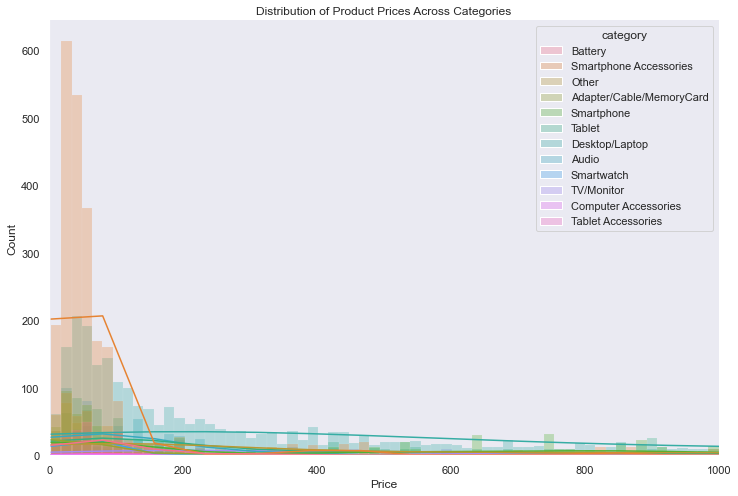

In [106]:
import seaborn as sns

plt.subplots(figsize=(12, 8))

sns.histplot(data=products_cl, x='price', hue='category', 
             alpha=.3, # add transparency to you chart
             kde=True, # add a density line in the histogram
             bins=1000 # define the number of bins the variable total paid will be grouped
            )

plt.xlim(0, 1000)
plt.title('Distribution of Product Prices Across Categories')
plt.xlabel('Price')
sns.despine() # remove the top and right margin, to make your plot

In [107]:
df_merge = orderline_product_order_merge_compl.merge(products_cl[['sku', 'category', 'name', 'desc']], on ='sku')

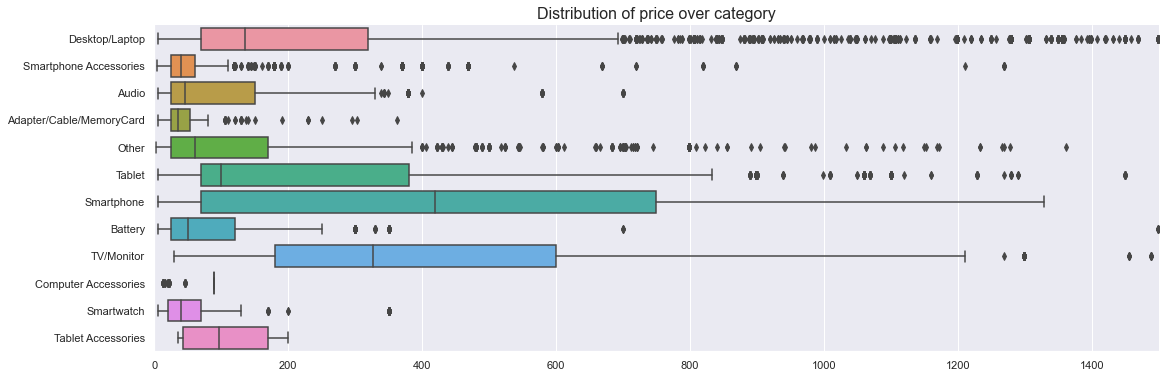

In [108]:
sns.set(font_scale=1)
plt.subplots(figsize = (18, 6))
ax = sns.boxplot(data = df_merge, x = 'price', y = 'category')#, orient = 'v')


#plt.axvline(x= 0 , color='r', linestyle='--')

sns.set_style("white")

plt.xlim(0, 1500)
plt.title('Distribution of price over category', fontsize = 16)
plt.xlabel('')
plt.ylabel('')
sns.despine() # remove the top and right margin, to make your plot prettier 
plt.savefig('Distribution_price_category.png')

In [109]:
df_merge = orderline_product_order_merge_compl.merge(products_cl[['sku', 'category', 'name', 'desc']], on ='sku')

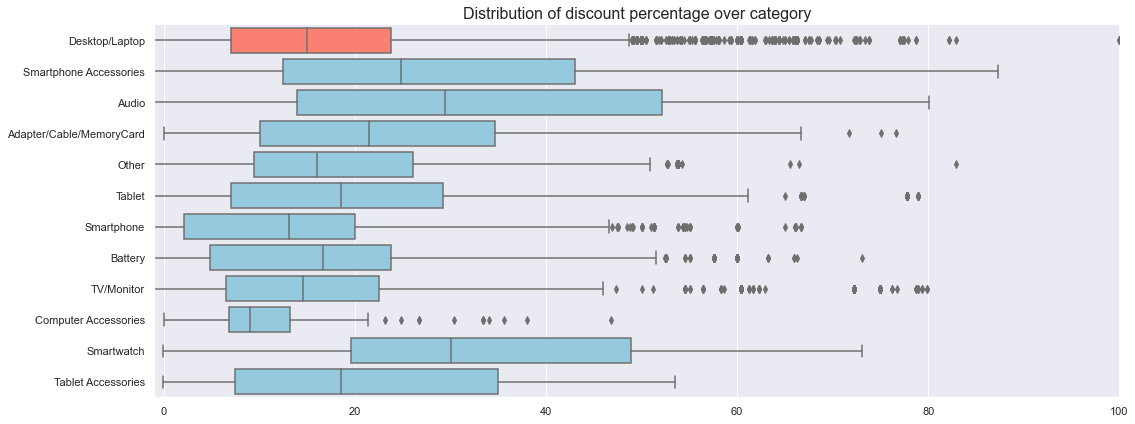

In [110]:
sns.set(font_scale=1)
plt.subplots(figsize = (16, 6))
colors = ['red' if x =='Desktop/Laptop' else 'blue' for x in df_merge.category.unique()]
ax = sns.boxplot(data = df_merge, x = 'discount_percent', y = 'category', color = 'skyblue')#, orient = 'v')
ax.patches[0].set_facecolor('salmon')

#plt.axvline(x= 0 , color='r', linestyle='--')
plt.tight_layout()

sns.set_style("white")

plt.xlim(-1, 100)
plt.title('Distribution of discount percentage over category', fontsize =16)
plt.xlabel('')
plt.ylabel('')
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:.0%}'.format(val/100) for val in vals])
sns.despine() # remove the top and right margin, to make your plot prettier 
plt.savefig('Distribution_discount_percentage.png')

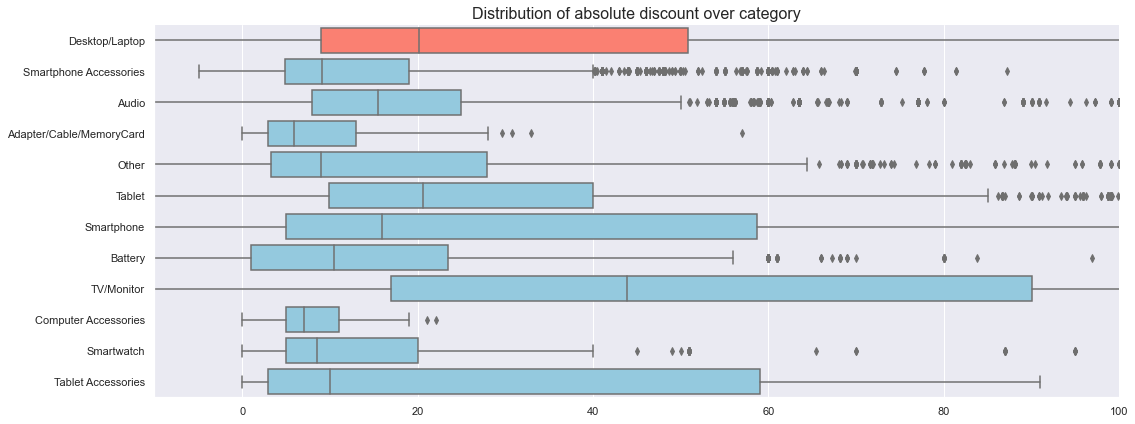

In [111]:
sns.set(font_scale=1)
plt.subplots(figsize = (16, 6))
ax = sns.boxplot(data = df_merge, x = 'discount_price', y = 'category', color = 'skyblue')#, orient = 'v')
ax.patches[0].set_facecolor('salmon')

#plt.axvline(x= 0 , color='r', linestyle='--')

plt.tight_layout()
sns.set_style("white")

plt.xlim(-10, 100)
plt.title('Distribution of absolute discount over category', fontsize = 16)
plt.xlabel('')
plt.ylabel('')
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:.0%}'.format(val/100) for val in vals])
sns.despine() # remove the top and right margin, to make your plot prettier 
plt.savefig('Distribution_absolute_discount.png')

In [112]:
df_merge[df_merge.category=='Desktop/Laptop'].name

0           OWC In-line Digital Temperature Sensor Kit HDD iMac 2011
1           OWC In-line Digital Temperature Sensor Kit HDD iMac 2011
2           OWC In-line Digital Temperature Sensor Kit HDD iMac 2011
3           OWC In-line Digital Temperature Sensor Kit HDD iMac 2011
4           OWC In-line Digital Temperature Sensor Kit HDD iMac 2011
                                    ...                             
43568                  Satechi USB-C Gigabit Ethernet Adapter Silver
43569    Open - OWC Data Doubler Optical Bay Adapter Mac Mini (2010)
43574                        Satechi MacBook Support Vertical Silver
43575                        Satechi MacBook Support Vertical Silver
43578                                        Samsung SSD 860 EVO 1TB
Name: name, Length: 17071, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\116442936.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(val/1000000)) + 'M' for val in vals])


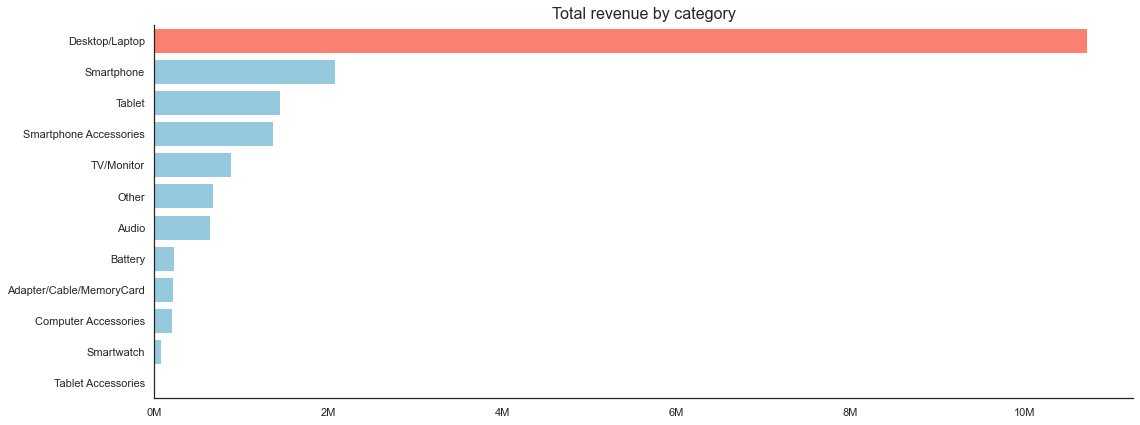

In [113]:
plt.figure(figsize = (16, 6))
ax = sns.barplot(data = df_merge.groupby('category').agg({'total_paid':'sum'}).reset_index().sort_values(by='total_paid', ascending = False), \
                 y='category', x='total_paid', color = 'skyblue')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
sns.set_theme(style='dark')
ax.patches[0].set_facecolor('salmon')
plt.title('Total revenue by category', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x') # remove scientific notation for the y axis
#plt.legend(['No Discount', 'Discount'])
plt.legend(loc='upper left', frameon=False)#, labels=['No Discount', 'Discount'])
#plt.legend(['No Discount', 'Discount'])
vals = ax.get_xticks()
ax.set_xticklabels([str(int(val/1000000)) + 'M' for val in vals])
sns.despine()
plt.savefig('Revenue_by_category.png')


In [114]:
df_merge.groupby('category').agg({'unit_price':'mean'})

,unit_price
category,
Adapter/Cable/MemoryCard,32.759026
Audio,69.946707
Battery,67.416718
Computer Accessories,66.452717
Desktop/Laptop,404.914492
Other,120.430236
Smartphone,403.998320
Smartphone Accessories,53.898232
Smartwatch,40.631420


# Categorization of Product using name and type

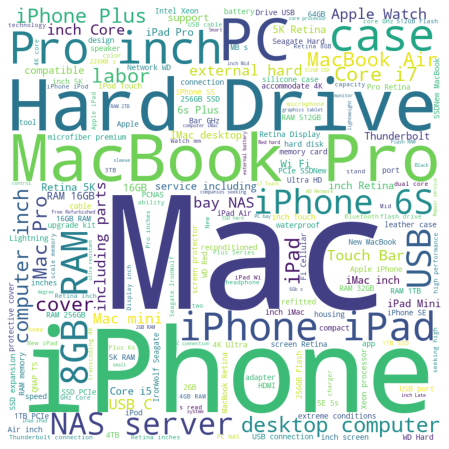

In [184]:
from wordcloud import WordCloud, STOPWORDS
word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS).generate(products.desc.str.cat())
plt.figure(figsize = (8, 8))
plt.imshow(word_cloud)
plt.axis("off");

In [116]:
from collections import Counter

count_dict_product = Counter(products[products.type=='13855401'].name.str.cat(sep=' ').split())
count_dict_product = dict(sorted(count_dict_product.items(), key = lambda x: x[1], reverse = True))

In [117]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [118]:
 # Define list of unque type

In [119]:
lst_type = list(products.type.unique())
product_typ_tbl = pd.DataFrame(columns = ['type', 'short_name'])
for product_typ in lst_type:
    product_name = products[products.type == product_typ].name.str.cat(sep=' ').split()
    product_name = ' '.join([item for item in product_name if item not in ['/', '-', '+', '|']]).split() # Removing all stopwords in name
    count_dict_product = Counter(product_name)
    count_dict_product = dict(sorted(count_dict_product.items(), key = lambda x: x[1], reverse = True))
    top_n = (list(count_dict_product.items()))[:8]
    top_n_words = [item[0] for item in top_n]
    top_n_words = ' '.join(top_n_words)
    top_n_words
    new_row = {'type': product_typ, 'short_name': top_n_words}
    new_row = pd.DataFrame([new_row])
    product_typ_tbl = pd.concat([product_typ_tbl, new_row], ignore_index=True)
    #product_typ_tbl = product_typ_tbl.append(new_row, ignore_index=True)

In [120]:
lst_type = list(products.type.unique())
product_typ_desc_tbl = pd.DataFrame(columns = ['type', 'short_name_desc'])
for product_typ in lst_type:
    product_name = products[products.type == product_typ].desc.str.cat(sep=' ').split()
    product_name = ' '.join([item for item in product_name if item not in ['/', '-', '+', '|', 'and', 'with', 'for', 'to']]).split() # Removing all stopwords in name
    count_dict_product = Counter(product_name)
    count_dict_product = dict(sorted(count_dict_product.items(), key = lambda x: x[1], reverse = True))
    top_n = (list(count_dict_product.items()))[:8]
    top_n_words = [item[0] for item in top_n]
    top_n_words = ' '.join(top_n_words)
    top_n_words
    new_row = {'type': product_typ, 'short_name_desc': top_n_words}
    new_row = pd.DataFrame([new_row])
    product_typ_desc_tbl = pd.concat([product_typ_desc_tbl, new_row], ignore_index=True)
    #product_typ_tbl = product_typ_tbl.append(new_row, ignore_index=True)

In [121]:
product_typ_cbn = product_typ_desc_tbl.merge(product_typ_tbl, on = 'type')

In [122]:
product_typ_cbn[:100]

,type,short_name_desc,short_name
0,1515,iPhone battery USB external iPad Battery small External,Battery External Power USB Mophie Bank battery mAh
1,11865403,iPhone 6 Plus case 7 Case cover microfiber,iPhone Case Plus 6 Black 6S 7 Apple
2,8696,MacBook support Pro aluminum Macbook all Support iMac,Support MacBook Aluminum Mac Pro Twelve South iMac
3,14365395,iPhone Lightning adapter iPod connector 5 Adapter iPad,Adapter Lightning Apple to iPhone Car and adapter
4,11905404,iPhone iPad iPod Bluetooth control of Touch. remote,iPhone and White Black iPad Parrot Philips Multimedia
5,5720,iPhone holder support Lightning cable access non-slip surface,iPhone Support Stand Black Aluminum Car iOttie Charging
6,12635403,iPad Pro cover Case Air cases Smart Mini,iPad Case Pro Apple Cover Smart Air Black
7,12645406,iPhone tools Mac iPad replacement kit Battery Kit,iFixit iPhone Kit Battery change 5 Screwdriver complete
8,5384,iPhone iPad iPod Bluetooth headset headphones wireless design,Headphones Wireless Headset Beats Black Bluetooth by Dre
9,57445397,card USB Class s Memory speeds UHS Card,Card Memory Class USB Kingston s 64GB 32GB


In [123]:
product_typ_cbn[100:]

,type,short_name_desc,short_name
100,21622158,PC Mac mini Core 2 Duo 226GHz reconditioned,Second hand Apple Mac mini Core 2 Duo
101,24811716,iPhone Plus 6s Apple Free Refurbished New 32GB,Apple iPhone Plus 6s Like new Gold 32GB
102,85641716,iPhone 7 Apple Free New Black 128GB Gold,Apple iPhone 7 Like new Gold Black 128GB
103,51871714,iPad Pro 9.7-inch Wi-Fi 128GB 32GB Apple Space,"Apple iPad Pro 9.7 Wi-Fi Oro ""Wi-Fi Like"
104,"5,45E+15",Computer Refurbished Mac mini Core 2 Duo 4GB,Second hand Apple Mac mini Core 2 Duo
105,106431714,Pro iPad Wi-Fi New Cellular 64GB 256GB 512GB,"Apple iPad Pro ""Wi-Fi 10.5 Cellular 64GB 256GB"
106,21571716,Apple iPhone 6 Plus Free Refurbished Color 16GB,Like new Apple iPhone 6 Plus 16GB Silver
107,85651716,iPhone 7 Apple Plus Free New Black 128GB,Apple iPhone 7 Plus Like new Black 128GB
108,113291716,Apple iPhone 8 64GB Free Gold 256GB in,Apple iPhone 8 64GB Gold 256GB Like new
109,5185,Apple Watch the 1st gene. touch screen monitor,Apple Watch the 1st Gen. 42mm Stainless Steel


In [124]:
import re
product_typ_cbn['category_new'] = 'no'
product_typ_cbn.loc[product_typ_cbn.short_name.str.contains('Battery|Case|Keyboard|Mouse|Adapter|Headphone|Cable|Protector|Charging|Repair|Multimedia|Memory|AppleCare', flags=re.IGNORECASE, regex=True),\
                    'category_new'] = 'Accessories'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Apple', flags=re.IGNORECASE, regex=True))&(product_typ_cbn.short_name.str.contains('iMac', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Desktop/Laptop'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Apple', flags=re.IGNORECASE, regex=True))&(product_typ_cbn.short_name.str.contains('iphone', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Iphone'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Apple', flags=re.IGNORECASE, regex=True))&(product_typ_cbn.short_name.str.contains('Mac', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Desktop/Laptop'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Apple', flags=re.IGNORECASE, regex=True))&(product_typ_cbn.short_name.str.contains('Ipad|Ipod', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Ipad/Ipod'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Apple', flags=re.IGNORECASE, regex=True))&(product_typ_cbn.short_name.str.contains('Watch', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Apple Watch'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Watch', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Watch'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Apple', flags=re.IGNORECASE, regex=True))&(product_typ_cbn.short_name.str.contains('TV', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Apple TV'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Monitor', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Monitor'
# product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Macbook', flags=re.IGNORECASE, regex=True))&\
#                     (product_typ_cbn.category_new == 'no'),\
#                     'category_new'] = 'Laptop'
product_typ_cbn.loc[(product_typ_cbn.short_name.str.contains('Memory|USB|SanDisk|Ram|Server|drive', flags=re.IGNORECASE, regex=True))&\
                    (product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Storage'
product_typ_cbn.loc[(product_typ_cbn.category_new == 'no'),\
                    'category_new'] = 'Other'

In [125]:
product_typ_cbn.loc[product_typ_cbn.type == '9,29E+11', 'category_new'] = 'Desktop/Laptop'
product_typ_cbn.loc[product_typ_cbn.type == '13955395', 'category_new'] = 'Accessories'

In [126]:
product_typ_cbn[:100]

,type,short_name_desc,short_name,category_new
0,1515,iPhone battery USB external iPad Battery small External,Battery External Power USB Mophie Bank battery mAh,Accessories
1,11865403,iPhone 6 Plus case 7 Case cover microfiber,iPhone Case Plus 6 Black 6S 7 Apple,Accessories
2,8696,MacBook support Pro aluminum Macbook all Support iMac,Support MacBook Aluminum Mac Pro Twelve South iMac,Other
3,14365395,iPhone Lightning adapter iPod connector 5 Adapter iPad,Adapter Lightning Apple to iPhone Car and adapter,Accessories
4,11905404,iPhone iPad iPod Bluetooth control of Touch. remote,iPhone and White Black iPad Parrot Philips Multimedia,Accessories
5,5720,iPhone holder support Lightning cable access non-slip surface,iPhone Support Stand Black Aluminum Car iOttie Charging,Accessories
6,12635403,iPad Pro cover Case Air cases Smart Mini,iPad Case Pro Apple Cover Smart Air Black,Accessories
7,12645406,iPhone tools Mac iPad replacement kit Battery Kit,iFixit iPhone Kit Battery change 5 Screwdriver complete,Accessories
8,5384,iPhone iPad iPod Bluetooth headset headphones wireless design,Headphones Wireless Headset Beats Black Bluetooth by Dre,Accessories
9,57445397,card USB Class s Memory speeds UHS Card,Card Memory Class USB Kingston s 64GB 32GB,Accessories


In [127]:
products_new = products.merge(product_typ_cbn[['type', 'category_new']], on = 'type')

In [128]:
products_new['check_new'] = 'Brand new'
products_new.loc[products_new.name.str.contains('Like new',flags=re.IGNORECASE, regex=True), 'check_new'] = 'Like new'
products_new.loc[products_new.name.str.contains('Second hand',flags=re.IGNORECASE, regex=True), 'check_new'] = 'Second hand'

In [185]:
products_new[products_new.check_new == 'Second hand'].sample(5)

,sku,name,desc,in_stock,type,price,promo_price,min,max,brand_short,category_new,check_new
9831,PAC2200,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz | 2GB RAM | 160GB HDD",Refurbished iMac 20 inch Core 2 Duo | 2GB RAM | 160GB HDD,0,"5,43E+15",1199.0,255.59,NaN,NaN,PAC,Desktop/Laptop,Second hand
9084,PAC2068,"Second hand - Apple iMac 21.5 ""Core i3 306GHz | 4GB RAM | 500GB HDD",Computer Refurbished iMac Core i3 215 inches 306GHz | 4GB RAM | 500GB HDD,0,1282,1199.0,649.00,649.00,649.00,PAC,Desktop/Laptop,Second hand
9955,AP20360,"Second hand - Apple MacBook Pro 13 ""Core i7 24 GHz | 8GB RAM | 256GB PCIe SSD Plata",MacBook used and revised 13-inch i7 8GB RAM 24 GHz and 256GB SSD PCIe,0,"1,02E+12",2059.0,1505.59,1505.59,1505.59,AP2,Desktop/Laptop,Second hand
2570,AP20363,Second hand - Apple Lightning to USB Cable 1m,Apple cable used and reviewed with USB connection to Lightning 1 m for iPhone iPad and iPod,0,1325,25.0,14.00,12.60,12.60,AP2,Accessories,Second hand
9182,PAC1916,"Second hand - Apple iMac 27 ""Core i5 Quad-Core 27GHz | 4GB RAM | 1TB HDD | Mid 2011 (MC813LL / A)",IMac computers used 27-inch Core i5 Quad-Core 27GHz | 4GB RAM | 1TB HDD | Mid 2011 (MC813LL / A),0,1282,1699.0,1050.59,929.99,1050.59,PAC,Desktop/Laptop,Second hand


In [130]:
products_new.drop(columns='type_new', inplace = True)

In [131]:
orderlines.drop(columns = 'check_orders', inplace = True)

In [132]:
orderline_product_order_merge_compl.columns

Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date', 'total_price', 'check_orders', 'year', 'month_num', 'week_year',
       'month', 'month_year', 'price', 'brand_short', 'discount_price',
       'discount_percent', 'order_id', 'state', 'total_paid', 'discount_True',
       'date_series'],
      dtype='object')

In [133]:
products_new

,sku,name,desc,in_stock,type,price,promo_price,min,max,brand_short,category_new,check_new
0,CEL0052,Celly 4000mAh Battery Power Bank Aluminum Silver,external battery capacity 4000mAh output voltage 5V,0,1515,23.92,19.99,19.99,24.99,CEL,Accessories,Brand new
1,CEL0051,Celly 4000mAh Battery Power Bank Aluminum Dorado,external battery capacity 4000mAh output voltage 5V,0,1515,23.74,12.99,21.24,24.99,CEL,Accessories,Brand new
2,CEL0015,Celly fur-lined Powerbank battery 4000mAh Black,Leather-wrapped External Battery 4000mAh for iPhone iPad and iPod.,0,1515,23.99,23.99,23.99,23.99,CEL,Accessories,Brand new
3,WOE0014,Wowewa M32 External Battery Power Bank 3000mAh White,3000mAh external battery light and compact (77g) with output micro USB and Lightning for iPhone,1,1515,19.99,9.99,8.49,16.99,WOE,Accessories,Brand new
4,TRI0026,Tribe External Battery Power Bank 2600 mAh 1 in a Minion,2600mAh external battery for iPhone small and ultra-compact.,0,1515,19.99,19.99,NaN,NaN,TRI,Accessories,Brand new
...,...,...,...,...,...,...,...,...,...,...,...,...
10552,APP2658,"Apple iMac Pro 27 ""10-core Intel Xeon 3GHz W | 128GB | 4TB SSD | Radeon Pro Vega 64",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor 3GHz W,0,118692158,13419.00,12614.00,NaN,NaN,APP,Desktop/Laptop,Brand new
10553,APP2695,"Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz | 128GB | 4TB SSD | Radeon Pro Vega 56",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor W of 25GHz,0,118692158,13659.00,12839.01,NaN,NaN,APP,Desktop/Laptop,Brand new
10554,APP2659,"Apple iMac Pro 27 ""14-core Intel Xeon W 25GHz | 128GB | 4TB SSD | Radeon Pro Vega 64",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor W of 25GHz,0,118692158,14379.00,13516.00,13799.00,13799.00,APP,Desktop/Laptop,Brand new
10555,APP2696,"Apple iMac Pro 27 ""18-core Intel Xeon W 23GHz | 128GB | 4TB SSD | Radeon Pro Vega 56",Pro iMac 27 inch screen Retina 5K and Intel Xeon processor W of 23GHz,0,118692158,14619.00,13742.01,NaN,NaN,APP,Desktop/Laptop,Brand new


In [134]:
df_merge_category = orderline_product_order_merge_compl.merge(products_new[['sku', 'name','category_new', 'check_new']], on = 'sku', how = 'inner')

In [135]:
df_merge_category

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,year,...,discount_price,discount_percent,order_id,state,total_paid,discount_True,date_series,name,category_new,check_new
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,True,2017,...,13.50,22.134776,299545,Completed,51.48,1,2017-01-01,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Accessories,Brand new
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,47.49,True,2017,...,13.50,22.134776,299404,Completed,415.11,1,2017-01-01,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Accessories,Brand new
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,49.99,True,2017,...,11.00,18.035744,300650,Completed,49.99,1,2017-01-02,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Accessories,Brand new
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,49.99,True,2017,...,11.00,18.035744,300760,Completed,73.97,1,2017-01-02,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Accessories,Brand new
4,1134856,296253,0,1,OWC0100,49.99,2017-01-08 12:11:12,49.99,True,2017,...,11.00,18.035744,296253,Completed,308.95,1,2017-01-08,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Accessories,Brand new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44034,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,83.99,True,2018,...,15.01,15.161616,526066,Completed,87.98,1,2018-03-12,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,Other,Brand new
44035,1647582,526134,0,1,DEV0020,149.99,2018-03-12 20:17:16,149.99,True,2018,...,0.00,0.000000,526134,Completed,154.98,0,2018-03-12,Devolo dLAN 500 Wi-Fi Adapter Kit PLC,Other,Brand new
44036,1647726,526198,0,1,APP1532,49.99,2018-03-12 23:00:09,49.99,True,2018,...,29.01,36.721519,526198,Completed,54.98,1,2018-03-12,"Apple iPad Silicone Cover Case Pro 97 ""Light Pink",Accessories,Brand new
44037,1648457,526512,0,1,DLK0044-A,84.32,2018-03-13 16:19:18,84.32,True,2018,...,55.67,39.767126,526512,Completed,89.31,1,2018-03-13,Open - D-Link DCS-5020L wireless surveillance camera Day / Night Network,Other,Brand new


In [136]:
df_merge_category.groupby('category_new').agg({'unit_price':'mean'})

,unit_price
category_new,
Accessories,66.992232
Apple TV,171.721856
Apple Watch,42.361885
Desktop/Laptop,1691.576869
Ipad/Ipod,577.933765
Iphone,663.925292
Monitor,444.305932
Other,148.992658
Storage,195.756625


In [137]:
df_merge_category.groupby('category_new').agg({'price':'mean'})

,price
category_new,
Accessories,85.559779
Apple TV,190.855670
Apple Watch,55.382094
Desktop/Laptop,1915.358004
Ipad/Ipod,618.430062
Iphone,699.790252
Monitor,498.263211
Other,181.696476
Storage,227.762850


In [138]:
df_merge_category

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,year,...,discount_price,discount_percent,order_id,state,total_paid,discount_True,date_series,name,category_new,check_new
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,True,2017,...,13.50,22.134776,299545,Completed,51.48,1,2017-01-01,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Accessories,Brand new
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,47.49,True,2017,...,13.50,22.134776,299404,Completed,415.11,1,2017-01-01,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Accessories,Brand new
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,49.99,True,2017,...,11.00,18.035744,300650,Completed,49.99,1,2017-01-02,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Accessories,Brand new
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,49.99,True,2017,...,11.00,18.035744,300760,Completed,73.97,1,2017-01-02,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Accessories,Brand new
4,1134856,296253,0,1,OWC0100,49.99,2017-01-08 12:11:12,49.99,True,2017,...,11.00,18.035744,296253,Completed,308.95,1,2017-01-08,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Accessories,Brand new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44034,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,83.99,True,2018,...,15.01,15.161616,526066,Completed,87.98,1,2018-03-12,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,Other,Brand new
44035,1647582,526134,0,1,DEV0020,149.99,2018-03-12 20:17:16,149.99,True,2018,...,0.00,0.000000,526134,Completed,154.98,0,2018-03-12,Devolo dLAN 500 Wi-Fi Adapter Kit PLC,Other,Brand new
44036,1647726,526198,0,1,APP1532,49.99,2018-03-12 23:00:09,49.99,True,2018,...,29.01,36.721519,526198,Completed,54.98,1,2018-03-12,"Apple iPad Silicone Cover Case Pro 97 ""Light Pink",Accessories,Brand new
44037,1648457,526512,0,1,DLK0044-A,84.32,2018-03-13 16:19:18,84.32,True,2018,...,55.67,39.767126,526512,Completed,89.31,1,2018-03-13,Open - D-Link DCS-5020L wireless surveillance camera Day / Night Network,Other,Brand new


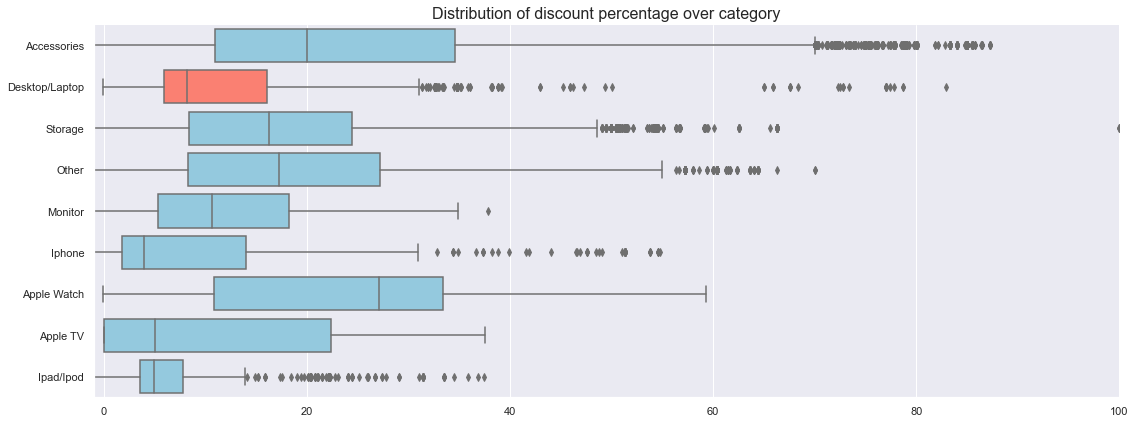

In [139]:
df_merge_category
sns.set(font_scale=1)
plt.subplots(figsize = (16, 6))
#colors = ['red' if x =='Desktop/Laptop' else 'blue' for x in df_merge_category.category_new.unique()]
ax = sns.boxplot(data = df_merge_category, x = 'discount_percent', y = 'category_new', color = 'skyblue')#, orient = 'v')
ax.patches[1].set_facecolor('salmon')

#plt.axvline(x= 0 , color='r', linestyle='--')
plt.tight_layout()

sns.set_style("white")

plt.xlim(-1, 100)
plt.title('Distribution of discount percentage over category', fontsize =16)
plt.xlabel('')
plt.ylabel('')
# vals = ax.get_yticks()
# ax.set_yticklabels(['{:.0%}'.format(val/100) for val in vals])
sns.despine() # remove the top and right margin, to make your plot prettier 
plt.savefig('Distribution_discount_percentage.png')

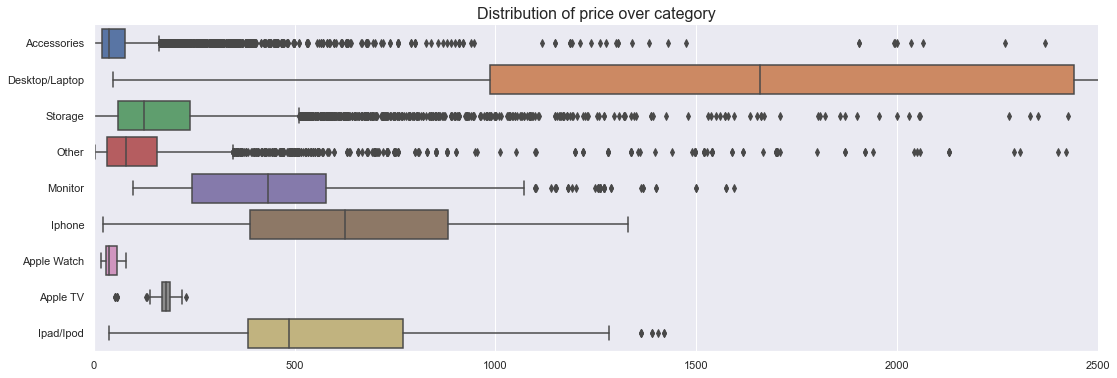

In [140]:
sns.set(font_scale=1)
plt.subplots(figsize = (18, 6))
ax = sns.boxplot(data = df_merge_category, x = 'unit_price', y = 'category_new')#, orient = 'v')


#plt.axvline(x= 0 , color='r', linestyle='--')

sns.set_style("white")

plt.xlim(0, 2500)
plt.title('Distribution of price over category', fontsize = 16)
plt.xlabel('')
plt.ylabel('')
sns.despine() # remove the top and right margin, to make your plot prettier 
#plt.savefig('Distribution_price_category.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\4093862269.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(val/1000000)) + 'M' for val in vals])


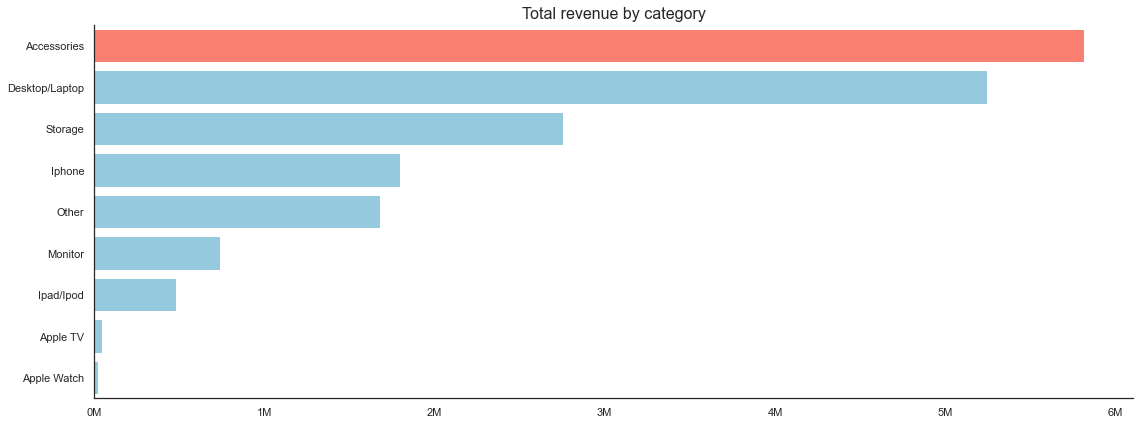

In [141]:
plt.figure(figsize = (16, 6))
ax = sns.barplot(data = df_merge_category.groupby('category_new').agg({'total_paid':'sum'}).reset_index().sort_values(by='total_paid', ascending = False), \
                 y='category_new', x='total_paid', color = 'skyblue')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
sns.set_theme(style='dark')
ax.patches[0].set_facecolor('salmon')
plt.title('Total revenue by category', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x') # remove scientific notation for the y axis
#plt.legend(['No Discount', 'Discount'])
plt.legend(loc='upper left', frameon=False)#, labels=['No Discount', 'Discount'])
#plt.legend(['No Discount', 'Discount'])
vals = ax.get_xticks()
ax.set_xticklabels([str(int(val/1000000)) + 'M' for val in vals])
sns.despine()
plt.savefig('Revenue_by_category.png')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


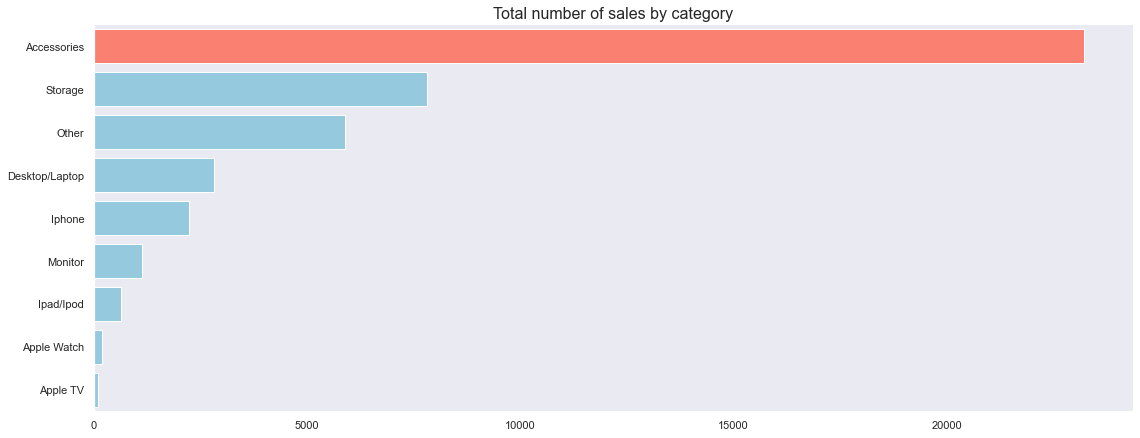

In [142]:
plt.figure(figsize = (16, 6))
ax = sns.barplot(data = df_merge_category.groupby('category_new').agg({'total_paid':'count'}).reset_index().sort_values(by='total_paid', ascending = False), \
                 y='category_new', x='total_paid', color = 'skyblue')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
sns.set_theme(style='dark')
ax.patches[0].set_facecolor('salmon')
plt.title('Total number of sales by category', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x') # remove scientific notation for the y axis
#plt.legend(['No Discount', 'Discount'])
plt.legend(loc='upper left', frameon=False)#, labels=['No Discount', 'Discount'])
#plt.legend(['No Discount', 'Discount'])
# vals = ax.get_xticks()
# ax.set_xticklabels([str(int(val/1000000)) + 'M' for val in vals])
sns.despine()

In [143]:
df_merge_category[df_merge_category.category_new == 'Accessories'].sort_values(by = 'unit_price').sample(50)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,year,...,discount_price,discount_percent,order_id,state,total_paid,discount_True,date_series,name,category_new,check_new
1689,1530913,478926,0,1,APP0698,9.49,2018-01-01 23:02:15,9.49,True,2018,...,15.51,62.040000,478926,Completed,284.49,1,2018-01-01,Apple Lightning Cable Connector to USB 1m White (OEM),Accessories,Brand new
42872,1591365,502556,0,1,ICA0090,55.99,2018-01-31 09:26:02,55.99,True,2018,...,23.96,29.968730,502556,Completed,290.90,1,2018-01-31,"Incase City Brief case MacBook Pro 15 ""Black",Accessories,Brand new
1751,1649324,526983,0,2,APP0698,9.99,2018-03-14 11:30:48,19.98,True,2018,...,15.01,60.040000,526983,Completed,23.97,1,2018-03-14,Apple Lightning Cable Connector to USB 1m White (OEM),Accessories,Brand new
15281,1274443,368754,0,1,PHI0077,30.99,2017-06-25 11:03:49,30.99,True,2017,...,3.96,11.330472,368754,Completed,328.95,1,2017-06-25,Philips Hue Single Bulb E27 White Ambiance,Accessories,Brand new
35588,1306011,383264,0,1,WAC0205-A,37.41,2017-07-29 15:54:01,37.41,True,2017,...,22.49,37.545910,383264,Completed,429.37,1,2017-07-29,Open - Wacom Bamboo Fineline 3 pointer Dark Blue,Accessories,Brand new
42340,1507301,467821,0,3,MAT0010,69.99,2017-12-20 12:42:28,209.97,True,2017,...,0.00,0.000000,467821,Completed,209.97,0,2017-12-20,Matias numeric keyboard + Spanish Aluminio Plata,Accessories,Brand new
20388,1151708,311774,0,1,NTE0022,109.99,2017-01-18 19:11:01,109.99,True,2017,...,36.00,24.659223,311774,Completed,113.98,1,2017-01-18,"NewerTech NuPower battery MacBook Pro 17 ""(2006-2008)",Accessories,Brand new
43788,1618025,513427,0,1,ZAG0037,9.99,2018-02-17 17:24:40,9.99,True,2018,...,20.00,66.688896,513427,Completed,13.98,1,2018-02-17,"Zagg iPad Case Rugged Messenger 97 ""(2017) Black and Transparent",Accessories,Brand new
5889,1122930,301276,0,2,ELG0039,39.99,2017-01-03 05:23:02,79.98,True,2017,...,9.96,19.939940,301276,Completed,174.97,1,2017-01-03,Elgato Eve Energy Power and Power Wireless Sensor,Accessories,Brand new
25928,1447898,443814,0,1,BEL0070,25.49,2017-11-25 18:17:13,25.49,True,2017,...,24.50,49.009802,443814,Completed,29.48,1,2017-11-25,Music Receiver Belkin iPhone music receiver,Accessories,Brand new


C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\2338391066.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(item/1000000) + 'M' for item in y_ticks])


Text(0, 0.5, '')

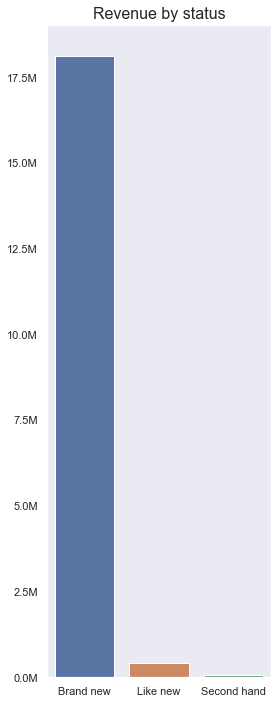

In [144]:
plt.figure(figsize = (4,12))
ax = sns.barplot(data = df_merge_category.groupby('check_new').agg({'total_paid':'sum'}).reset_index(), x = 'check_new', y = 'total_paid')
y_ticks = ax.get_yticks()
ax.set_yticklabels([str(item/1000000) + 'M' for item in y_ticks])
plt.title('Revenue by status', fontsize = 16)
plt.xlabel('')
plt.ylabel('')

In [145]:
df_merge_category.groupby('check_new').agg({'discount_percent':'mean'})

,discount_percent
check_new,
Brand new,20.612515
Like new,26.019851
Second hand,44.419950


In [146]:
df_merge_category.sample(20)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,year,...,discount_price,discount_percent,order_id,state,total_paid,discount_True,date_series,name,category_new,check_new
446,1426025,433799,0,1,TOS0007,53.09,2017-11-23 09:49:43,53.09,True,2017,...,9.90,15.716780,433799,Completed,505.49,1,2017-11-23,"Toshiba 1TB 25 ""SATA 5400rpm hard drive Mac and PC",Storage,Brand new
7411,1137211,305725,0,1,SPH0013,129.99,2017-01-09 13:56:24,129.99,True,2017,...,39.96,23.512798,305725,Completed,134.98,1,2017-01-09,Sphero BB-8 Star Wars Robot,Accessories,Brand new
28567,1365249,404719,0,1,APP1970,360.33,2017-09-29 12:38:01,360.33,True,2017,...,58.67,14.002387,404719,Completed,2265.92,1,2017-09-29,Apple iPhone 32GB Space Gray,Iphone,Brand new
3401,1246519,355167,0,1,LEX0028,53.99,2017-05-12 09:57:09,53.99,True,2017,...,36.00,40.004445,355167,Completed,53.99,1,2017-05-12,Lexar JumpDrive Lightning USB 3.0 M20i Pendrive 64GB,Storage,Brand new
26893,1224498,344412,0,1,DLK0080,186.99,2017-04-08 01:39:12,186.99,True,2017,...,23.00,10.952903,344412,Completed,5036.97,1,2017-04-08,D-Link DGS-1100-24 Gigabit Smart Switch 24 ports,Other,Brand new
31843,1275208,369128,0,1,APP2073,1282.00,2017-06-26 13:11:43,1282.00,True,2017,...,73.59,5.428633,369128,Completed,1282.00,1,2017-06-26,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM | 256GB SSD",Desktop/Laptop,Brand new
4520,1365762,406513,0,1,TRA0010,84.28,2017-09-29 22:39:05,84.28,True,2017,...,5.72,6.355556,406513,Completed,89.27,1,2017-09-29,"Transcend JetDrive Lite 130 128GB Macbook Air 13 """,Accessories,Brand new
33487,1520633,474244,0,1,ELA0033,26.59,2017-12-27 23:52:33,26.59,True,2017,...,13.41,33.525000,474244,Completed,48.57,1,2017-12-27,M2 elago iPhone Stand Aluminum Silver Support,Accessories,Brand new
254,1519773,473769,0,1,APP0410,31.34,2017-12-27 18:53:30,31.34,True,2017,...,3.66,10.457143,473769,Completed,59.32,1,2017-12-27,Apple Thunderbolt to FireWire 800 adapter,Accessories,Brand new
43735,1615716,512387,0,1,MOP0106,9.99,2018-02-16 08:14:28,9.99,True,2018,...,-0.99,-11.000000,512387,Completed,24.97,0,2018-02-16,Mophie Powerstation 6000mAh battery Universal Plus Gold,Accessories,Brand new


In [147]:
products_new.category_new.value_counts()

Accessories       5116
Storage           2254
Desktop/Laptop    1198
Other             1164
Iphone             275
Ipad/Ipod          244
Monitor            188
Apple Watch        109
Apple TV             9
Name: category_new, dtype: int64

In [148]:
product_typ_cbn[product_typ_cbn.category_new == 'Accessories']

,type,short_name_desc,short_name,category_new
0,1515,iPhone battery USB external iPad Battery small External,Battery External Power USB Mophie Bank battery mAh,Accessories
1,11865403,iPhone 6 Plus case 7 Case cover microfiber,iPhone Case Plus 6 Black 6S 7 Apple,Accessories
3,14365395,iPhone Lightning adapter iPod connector 5 Adapter iPad,Adapter Lightning Apple to iPhone Car and adapter,Accessories
4,11905404,iPhone iPad iPod Bluetooth control of Touch. remote,iPhone and White Black iPad Parrot Philips Multimedia,Accessories
5,5720,iPhone holder support Lightning cable access non-slip surface,iPhone Support Stand Black Aluminum Car iOttie Charging,Accessories
6,12635403,iPad Pro cover Case Air cases Smart Mini,iPad Case Pro Apple Cover Smart Air Black,Accessories
7,12645406,iPhone tools Mac iPad replacement kit Battery Kit,iFixit iPhone Kit Battery change 5 Screwdriver complete,Accessories
8,5384,iPhone iPad iPod Bluetooth headset headphones wireless design,Headphones Wireless Headset Beats Black Bluetooth by Dre,Accessories
9,57445397,card USB Class s Memory speeds UHS Card,Card Memory Class USB Kingston s 64GB 32GB,Accessories
10,1325,Cable USB cable Thunderbolt Mac MacBook PC 3,Cable to USB Thunderbolt Belkin HDMI Black USB-C,Accessories


In [149]:
(df_merge_category[df_merge_category.category_new == 'Accessories'][['name', 'price', 'unit_price', 'sku']]).sort_values(by = 'unit_price').sample(40)

,name,price,unit_price,sku
14690,Kingston DataTraveler SE9 32Gb USB 3.0 G2,17.28,7.99,KIN0150
5534,OtterBox Symmetry Alpha Glass Case + Screen Protector + Program 1 M ± or guarantee for iPhone 6 ...,49.99,11.99,OTT0132
25686,Satechi Clamp Hub 4 USB 3.0 Aluminum iMac,39.99,27.99,SAT0052
15306,Kanex Lightning to USB Cable 3m White,27.95,18.99,KAN0018
4312,Elgato Eve and Energy Plug Power Wireless Sensor Pack 2 units,99.98,87.99,PAC1400
20151,"Apple iPad Silicone Cover Case Pro 129 ""Charcoal Gray",89.00,89.00,APP1219
12802,Jawbone UP3 Activity Monitor Black,179.99,49.99,JAW0040
33934,Belkin Valet Charging Dock Cable Apple Watch White,69.99,34.99,BEL0189
3755,OWC Data Doubler Pack MacBook / MacBook Pro,107.99,61.37,PAC0023
21306,Jabra Step Wireless Headset Black,69.99,59.99,JAB0039


In [150]:
products_new.category_new.value_counts()

Accessories       5116
Storage           2254
Desktop/Laptop    1198
Other             1164
Iphone             275
Ipad/Ipod          244
Monitor            188
Apple Watch        109
Apple TV             9
Name: category_new, dtype: int64

In [151]:
products_new.loc[(products_new.name.str.contains('Apple|Pro|Air', regex=True, flags=re.IGNORECASE)& products_new.name.str.contains('Macbook|Mac', regex=True, flags=re.IGNORECASE)& (products_new.category_new == 'Accessories')) & \
                 (products_new.name.str.contains('Battery|Case|Keyboard|Mouse|Adapter|Headphone|Cable|Protector|Charging|Repair|Multimedia|Memory|AppleCare', regex=True, flags=re.IGNORECASE) == False), 'category_new']

64      Accessories
1431    Accessories
1508    Accessories
2440    Accessories
2442    Accessories
           ...     
6556    Accessories
6557    Accessories
6560    Accessories
6561    Accessories
6577    Accessories
Name: category_new, Length: 162, dtype: object

In [152]:
products_new.loc[(products_new.name.str.contains('Apple|Pro|Air', regex=True, flags=re.IGNORECASE)& products_new.name.str.contains('Macbook|Mac', regex=True, flags=re.IGNORECASE)& (products_new.category_new == 'Accessories')) & \
                 (products_new.name.str.contains('Battery|Case|Keyboard|Mouse|Adapter|Headphone|Cable|Protector|Charging|Repair|Multimedia|Memory|AppleCare', regex=True, flags=re.IGNORECASE) == False), 'category_new'] = 'Desktop/Laptop'
products_new.loc[products_new.name.str.contains('Apple', regex=True, flags=re.IGNORECASE)&products_new.name.str.contains('Ipod|Ipad', regex=True, flags=re.IGNORECASE) & (products_new.category_new == 'Accessories'), 'category_new'] = 'Ipad/Ipod'
products_new.loc[products_new.name.str.contains('Apple', regex=True, flags=re.IGNORECASE)&products_new.name.str.contains('Iphone', regex=True, flags=re.IGNORECASE) & (products_new.category_new == 'Accessories'), 'category_new'] = 'Ipad/Ipod'
products_new.loc[products_new.name.str.contains('Apple', regex=True, flags=re.IGNORECASE)&products_new.name.str.contains('Watch', regex=True, flags=re.IGNORECASE), 'category_new'] = 'Apple Watch'
products_new.loc[products_new.name.str.contains('Monitor', regex=True, flags=re.IGNORECASE)&(products_new.category_new == 'Accessories'), 'category_new'] = 'Monitor'
products_new.loc[products_new.name.str.contains('Memory|Server|SSD|HDD|Hard Drive', regex=True, flags=re.IGNORECASE) & (products_new.category_new == 'Accessories'), 'category_new'] = 'Storage'
products_new.loc[products_new.name.str.contains('Open', regex=True, flags=re.IGNORECASE), 'check_new'] = 'Open'

In [153]:
products_new[products_new.category_new == 'Accessories'].sort_values(by = 'price', ascending = False).head(100)

,sku,name,desc,in_stock,type,price,promo_price,min,max,brand_short,category_new,check_new
3669,WAC0213-A,Open - Wacom MobileStudio Pro 16 i7 512GB,Professional graphics tablet with 16-inch i7 and 512GB and Pen stylus Pro 2 for Mac and PC,0,1298,3199.90,2770.39,2763.79,2763.79,WAC,Accessories,Open
3660,WAC0157-A,Open - Wacom Cintiq Interactive Pen & Touch 27QHD Mac and PC Display,Professional graphics tablet touch screen with 2048 levels of pressure sensitive to the touch of...,0,1298,2549.90,1804.86,1995.11,2065.30,WAC,Accessories,Open
3649,WAC0024-A,Open - Wacom Cintiq 22HD Interactive Pen Display Mac and PC,portable graphic display with pen presición for Mac and PC.,0,1298,1799.00,1273.98,NaN,NaN,WAC,Accessories,Open
1709,DJI0022,Mavic Pro DJI Drone Fly More Combo,Drone cuadricóptero quality camera integrated battery for iPhone and iPad,1,11905404,1499.00,1499.00,1061.98,1499.00,DJI,Accessories,Brand new
1707,PAR0070,Parrot Drone + DISCO Command FLYPAD and FPV Glasses,Remote control WIFI 45 minutes FLYPAD autonomous command and FPV glasses for iPhone iPod and iPa...,0,11905404,1299.00,1038.99,1196.99,1259.99,PAR,Accessories,Brand new
3628,WAC0222-A,"Open - Wacom Cintiq graphics tablet Pro 13 ""FHD",graphics tablet 13-inch FHD resolution (1920x1080px) 87% Adobe RGB integrates Pen Pencil Pro 2-C...,0,1298,1099.90,778.54,756.72,890.27,WAC,Accessories,Open
3622,GTE0073-A,Open - G-Technology G-RAID Thunderbolt 12TB Extraóble 2 USB 3.0 silver,12TB RAID disk with 2 bays and removable disks Thunderbolt connection 2 and USB 3.0 for Mac and PC,0,1298,1017.70,807.77,799.97,799.97,GTE,Accessories,Open
1705,ELG0033-2,Elgato Eve and Energy Plug Power Wireless Sensor Pack 2 units,Control on / off and power / consumer remote sensor for iPad iPhone iPod Touch and Apple Watch.,1,11905404,999.90,999.90,NaN,NaN,ELG,Accessories,Brand new
1703,PAR0064,Parrot Bebop Drone White 2 + SkyController,cuadricóptero wireless remote control with Skycontroller.,0,11905404,949.00,799.00,NaN,NaN,PAR,Accessories,Brand new
1702,PAR0065,Parrot Bebop Drone + 2 Red Skycontroller,cuadricóptero wireless remote control with Skycontroller.,0,11905404,949.00,799.00,NaN,NaN,PAR,Accessories,Brand new


In [154]:
products_new.category_new.value_counts()

Accessories       3788
Storage           2677
Desktop/Laptop    1360
Other             1164
Ipad/Ipod          667
Apple Watch        345
Iphone             275
Monitor            272
Apple TV             9
Name: category_new, dtype: int64

In [177]:
df_merge_category = orderline_product_order_merge_compl.merge(products_new[['sku', 'name','category_new', 'check_new']], on = 'sku', how = 'inner')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\2273730275.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(val/1000000)) + 'M' for val in vals])


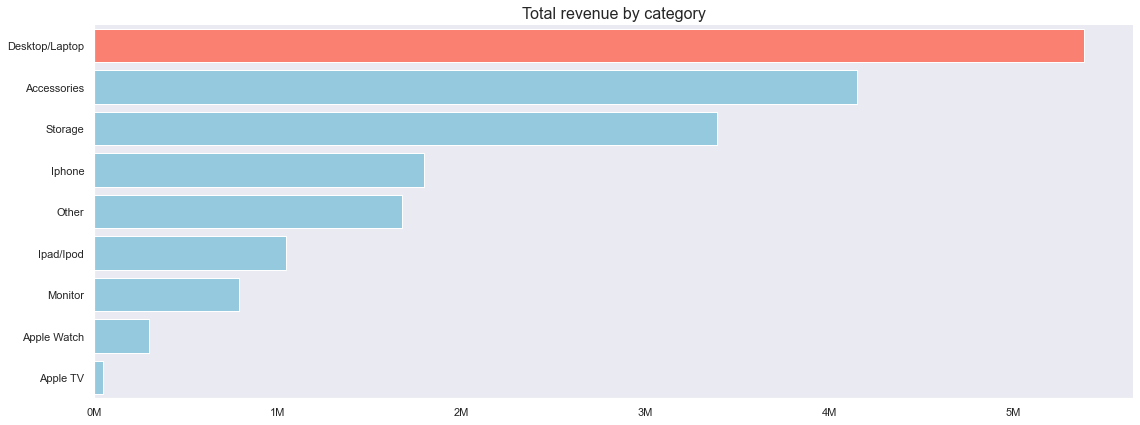

In [178]:
plt.figure(figsize = (16, 6))
ax = sns.barplot(data = df_merge_category.groupby('category_new').agg({'total_paid':'sum'}).reset_index().sort_values(by='total_paid', ascending = False), \
                 y='category_new', x='total_paid', color = 'skyblue')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
sns.set_theme(style='dark')
ax.patches[0].set_facecolor('salmon')
plt.title('Total revenue by category', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x') # remove scientific notation for the y axis
#plt.legend(['No Discount', 'Discount'])
plt.legend(loc='upper left', frameon=False)#, labels=['No Discount', 'Discount'])
#plt.legend(['No Discount', 'Discount'])
vals = ax.get_xticks()
ax.set_xticklabels([str(int(val/1000000)) + 'M' for val in vals])
sns.despine()
plt.savefig('Revenue_by_category.png')

In [164]:
df_merge_category.category_new.value_counts()

Accessories       16447
Storage           10599
Other              5896
Desktop/Laptop     3308
Ipad/Ipod          2983
Iphone             2224
Monitor            1385
Apple Watch        1100
Apple TV             97
Name: category_new, dtype: int64

In [180]:
df_merge_category[(df_merge_category.name.str.contains('iphone', regex=True, flags=re.IGNORECASE))& df_merge_category.name.str.contains('Apple', regex=True, flags=re.IGNORECASE) & \
                  (df_merge_category.name.str.contains('Battery|Case|Keyboard|Mouse|Adapter|Headphone|Cable|Protector|Charging|Repair|Multimedia|Memory|AppleCare', regex=True, flags=re.IGNORECASE) == False) & (df_merge_category.category_new != 'Iphone')].sort_values(by = 'unit_price').tail(50)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,year,...,discount_price,discount_percent,order_id,state,total_paid,discount_True,date_series,name,category_new,check_new
30188,1607961,508983,0,1,APP1922,169.00,2018-02-09 19:08:40,169.00,True,2018,...,10.00,5.586592,508983,Completed,173.99,1,2018-02-09,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,Ipad/Ipod,Brand new
30189,1610342,510019,0,1,APP1922,169.00,2018-02-12 11:11:34,169.00,True,2018,...,10.00,5.586592,510019,Completed,173.99,1,2018-02-12,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,Ipad/Ipod,Brand new
30190,1610477,509253,0,1,APP1922,169.00,2018-02-12 12:37:12,169.00,True,2018,...,10.00,5.586592,509253,Completed,172.99,1,2018-02-12,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,Ipad/Ipod,Brand new
30184,1600048,505777,0,1,APP1922,169.00,2018-02-04 20:35:31,169.00,True,2018,...,10.00,5.586592,505777,Completed,173.99,1,2018-02-04,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,Ipad/Ipod,Brand new
29877,1341310,395700,0,1,APP1922,179.00,2017-09-02 10:23:56,179.00,True,2017,...,0.00,0.000000,395700,Completed,182.99,0,2017-09-02,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,Ipad/Ipod,Brand new
29875,1330387,395332,0,1,APP1922,179.00,2017-09-01 09:38:41,179.00,True,2017,...,0.00,0.000000,395332,Completed,182.99,0,2017-09-01,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,Ipad/Ipod,Brand new
29874,1330031,395191,0,1,APP1922,179.00,2017-08-31 20:19:53,179.00,True,2017,...,0.00,0.000000,395191,Completed,861.64,0,2017-08-31,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,Ipad/Ipod,Brand new
29873,1327030,393766,0,1,APP1922,179.00,2017-08-29 10:29:29,179.00,True,2017,...,0.00,0.000000,393766,Completed,179.00,0,2017-08-29,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,Ipad/Ipod,Brand new
29872,1325925,393292,0,1,APP1922,179.00,2017-08-28 09:04:33,179.00,True,2017,...,0.00,0.000000,393292,Completed,179.00,0,2017-08-28,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,Ipad/Ipod,Brand new
29871,1325696,392958,0,1,APP1922,179.00,2017-08-27 22:59:43,179.00,True,2017,...,0.00,0.000000,392958,Completed,179.00,0,2017-08-27,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,Ipad/Ipod,Brand new


In [182]:
products_new[products_new.type == '1298']

,sku,name,desc,in_stock,type,price,promo_price,min,max,brand_short,category_new,check_new
2844,WAC0173-A,(Open) Wacom parts 5 points for CTH670,Replacement tips for Bamboo Wacom Intuos and Cintiq series.,0,1298,5.99,3.76,NaN,NaN,WAC,Accessories,Open
2845,TUC0259-A,Open - Tucano Sottile iPhone Case SE / 5s / 5 Transparent,Ultrathin and transparent housing for iPhone SE / 5s / 5,0,1298,7.90,5.39,5.39,5.39,TUC,Accessories,Open
2846,ADN0013-A,(Open) Adonit Jot Pro Disc Replacement Flip mini and Touch Size S,Disc replacement rubber pointers Flip mini Adonith Pro and Touch.,0,1298,7.99,7.99,NaN,NaN,ADN,Accessories,Open
2847,NTE0087-A,Open - NewerTech Cable HDMI to HDMI 1.4A 090m,HDMI to HDMI Cable of 09 meters.,0,1298,9.95,2.82,2.82,2.82,NTE,Accessories,Open
2848,WOE0002-A,Open - Wowewa Protector Tempered Glass iPhone 6s Plus / 6 Plus,Tempered glass protector refitted for iPhone 6s Plus / 6 Plus,0,1298,9.99,6.99,5.86,5.86,WOE,Accessories,Open
...,...,...,...,...,...,...,...,...,...,...,...,...
3674,SAN0131-A,"Open - SanDisk 120GB SSD Plus 25 ""SATA 6Gb / s",SSD 120GB 25 inches,0,1298,63.53,63.53,45.80,56.93,SAN,Storage,Open
3675,APP0819-A,(Open) Apple iPhone 6 64GB Space Gray,New iPhone 6 64GB Free (MG4F2QL / A).,0,1298,74.90,67.90,NaN,NaN,APP,Ipad/Ipod,Open
3676,APP0851-A,(Open) Apple iPhone 6 Plus 64GB Space Gray,New iPhone 6 Plus 64GB Free (MGAH2QL / A).,0,1298,85.90,67.00,NaN,NaN,APP,Ipad/Ipod,Open
3677,APP2133-A,"Like new - Apple iPad Pro 12.9 ""Wi-Fi + Cellular 512GB Silver",iPad Pro 12.9 inch Wi-Fi refurbished 512GB Silver,0,1298,1449.00,1274.86,1274.86,1328.38,APP,Ipad/Ipod,Like new


In [169]:
df_merge_category

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,year,...,discount_price,discount_percent,order_id,state,total_paid,discount_True,date_series,name,category_new,check_new
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,True,2017,...,13.50,22.134776,299545,Completed,51.48,1,2017-01-01,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Storage,Brand new
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,47.49,True,2017,...,13.50,22.134776,299404,Completed,415.11,1,2017-01-01,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Storage,Brand new
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,49.99,True,2017,...,11.00,18.035744,300650,Completed,49.99,1,2017-01-02,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Storage,Brand new
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,49.99,True,2017,...,11.00,18.035744,300760,Completed,73.97,1,2017-01-02,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Storage,Brand new
4,1134856,296253,0,1,OWC0100,49.99,2017-01-08 12:11:12,49.99,True,2017,...,11.00,18.035744,296253,Completed,308.95,1,2017-01-08,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Storage,Brand new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44034,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,83.99,True,2018,...,15.01,15.161616,526066,Completed,87.98,1,2018-03-12,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,Other,Brand new
44035,1647582,526134,0,1,DEV0020,149.99,2018-03-12 20:17:16,149.99,True,2018,...,0.00,0.000000,526134,Completed,154.98,0,2018-03-12,Devolo dLAN 500 Wi-Fi Adapter Kit PLC,Other,Brand new
44036,1647726,526198,0,1,APP1532,49.99,2018-03-12 23:00:09,49.99,True,2018,...,29.01,36.721519,526198,Completed,54.98,1,2018-03-12,"Apple iPad Silicone Cover Case Pro 97 ""Light Pink",Ipad/Ipod,Brand new
44037,1648457,526512,0,1,DLK0044-A,84.32,2018-03-13 16:19:18,84.32,True,2018,...,55.67,39.767126,526512,Completed,89.31,1,2018-03-13,Open - D-Link DCS-5020L wireless surveillance camera Day / Night Network,Other,Open


In [183]:
df_merge_category[df_merge_category.category_new == 'Storage'].sort_values(by = 'price').tail(100)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,year,...,discount_price,discount_percent,order_id,state,total_paid,discount_True,date_series,name,category_new,check_new
33114,1367250,407253,0,1,PAC1978,1064.94,2017-10-02 11:26:20,1064.94,True,2017,...,92.93,8.025944,407253,Completed,1466.59,1,2017-10-02,Synology DS1817 + | 16GB RAM,Storage,Brand new
33115,1456219,439899,0,1,PAC1978,1071.35,2017-11-27 10:35:29,1071.35,True,2017,...,86.52,7.472341,439899,Completed,1243.48,1,2017-11-27,Synology DS1817 + | 16GB RAM,Storage,Brand new
35770,1310585,385833,0,1,PAC1308,1053.37,2017-08-03 13:23:52,1053.37,True,2017,...,106.58,9.188327,385833,Completed,1053.37,1,2017-08-03,Pack QNAP TS-451 + | 8GB RAM | Seagate 12TB IronWolf,Storage,Brand new
25763,1183356,325339,0,1,SYN0103,1167.90,2017-02-16 17:44:13,1167.90,True,2017,...,0.09,0.007706,325339,Completed,1167.90,0,2017-02-16,Synology NAS Server DS2015xs Mac and PC,Storage,Brand new
39365,1394178,420335,0,1,PAC2276,1094.37,2017-10-31 13:08:22,1094.37,True,2017,...,74.34,6.360859,420335,Completed,1094.37,1,2017-10-31,Synology DS918 + NAS Server | 16GB | 8TB (4x2TB) WD Red,Storage,Brand new
38566,1381816,414378,0,1,PAC2243,1001.99,2017-10-19 10:51:56,1001.99,True,2017,...,169.00,14.432233,414378,Completed,1001.99,1,2017-10-19,DS418play Synology NAS Server | 2GB RAM | 16TB (4x4TB) WD Red,Storage,Brand new
35857,1313682,387100,0,1,PAC2187,976.83,2017-08-08 10:08:48,976.83,True,2017,...,218.26,18.263060,387100,Completed,976.83,1,2017-08-08,Pack Qnap TS-453b mini 4G NAS server 16TB (4x4TB) WD Red,Storage,Brand new
41835,1460602,449341,0,1,SNN0032,1012.77,2017-11-27 20:19:43,1012.77,True,2017,...,196.02,16.216216,449341,Completed,5418.13,1,2017-11-27,Sonnet Echo Express III-R 2U Chassis Rack Thunderbolt 2,Storage,Brand new
41593,1454520,446606,0,1,PAC2248,1047.51,2017-11-26 23:49:20,1047.51,True,2017,...,185.47,15.042418,446606,Completed,1047.51,1,2017-11-26,DS418play Synology NAS Server | 6GB RAM | 16TB (4x4TB) WD Red,Storage,Brand new
41592,1444196,429754,0,1,PAC2248,1047.51,2017-11-25 00:23:54,1047.51,True,2017,...,185.47,15.042418,429754,Completed,1047.51,1,2017-11-25,DS418play Synology NAS Server | 6GB RAM | 16TB (4x4TB) WD Red,Storage,Brand new


In [161]:
df_merge_category.total_paid.sum()

18586198.339999996

In [158]:
# import re
# products['namedesc'] = products.name + products.desc

# products['product_category'] = np.where(products.namedesc.str.contains('SSD|HDD|Storage|Drive|SATA|Data|SDHC|SDXC|Seagate|WD|WesternDigital|Hard.*Disk|RAID', flags=re.IGNORECASE, regex=True), 'Storagehardware', "--O-T-H-E-R--")

# products['product_category'] = np.where(products.namedesc.str.contains('Cable|Charger', flags=re.IGNORECASE, regex=True), 'Cables & Charger', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('Adapter', flags=re.IGNORECASE, regex=True), 'Adapter', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('Speaker|Phones|Sound|Headset|Voice', flags=re.IGNORECASE, regex=True), 'Sound', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('Case|Protector|Capsule|Gauntlet|Sleeve|Enclosure', flags=re.IGNORECASE, regex=True), 'Protection', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('DDR', flags=re.IGNORECASE, regex=True), 'Memory', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('NAS', flags=re.IGNORECASE, regex=True), 'NAS', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('Dock|Dockingstation', flags=re.IGNORECASE, regex=True), 'Dockingstation', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('Watch', flags=re.IGNORECASE, regex=True), 'Smartwatch', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('Monitor|Display', flags=re.IGNORECASE, regex=True), 'Monitor', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('iPod', flags=re.IGNORECASE, regex=True), 'Musicplayer', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('iPad', flags=re.IGNORECASE, regex=True), 'Tablet', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('i?Phone', flags=re.IGNORECASE, regex=True), 'Smartphone', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('MacBook|Notebook|Laptop', flags=re.IGNORECASE, regex=True), 'Laptop', products['product_category'])
# products['product_category'] = np.where(products.namedesc.str.contains('i?Mac|Desktop', flags=re.IGNORECASE, regex=True), 'Desktop-PC', products['product_category'])

# #remove the namedesc-column
# products.drop(columns=["namedesc"], inplace=True)

In [159]:
products['name_desc'] = products.name.str.lower() + products.desc.str.lower()
products['cat'] = 'others'
products['n_rename'] = 0

cats={
      'memory' : ['memory'],
      'data starage':['hard drive','hard disk','raid','ssd','hdd','flash drive'],
      'support_dock_protection':['support','dock','protect'],
      'case':['case','housing'],
      'keyboard_mouse':['keyboard','keypad','mouse','padlock','numpad'], 
      'cable_adapters_chargers' : ['cable', 'adapter', 'charger','connector'],
      'battery':['battery'],
      'repair_services':['repair','services'],
      'laptop': ['laptop','apple macbook'],
      'desktop':['desktop','apple imac','apple mac pro'],
      'smartphone': ['smartphone','apple iphone'],
      'tablet':['tablet','apple ipad'],
      'display':['display','monitor'],
      'audio':['audio','headphones','loudspeaker','music','ipod','speaker'],
      'server':['server'],
      'camera':['camera'],
      'network': ['hub','switch','router']
      }
for key in cats:
    for s in cats[key]:
        products['cat'].loc[products.name_desc.str.contains(s) == True] = key
        products['n_rename'].loc[products.name_desc.str.contains(s) == True]+= 1 

In [191]:
orderline_product_order_merge_compl

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,year,...,month_year,price,brand_short,discount_price,discount_percent,order_id,state,total_paid,discount_True,date_series
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,True,2017,...,2017-01,60.99,OWC,13.50,22.134776,299545,Completed,51.48,1,2017-01-01
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,True,2017,...,2017-01,22.95,IOT,3.96,17.254902,299546,Completed,18.99,1,2017-01-01
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,True,2017,...,2017-01,89.00,APP,16.81,18.887640,295347,Completed,72.19,1,2017-01-01
10,1119126,299549,0,1,PAC0929,2565.99,2017-01-01 02:07:42,2565.99,True,2017,...,2017-01,3209.00,PAC,643.01,20.037706,299549,Completed,2565.99,1,2017-01-01
16,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,True,2017,...,2017-01,76.99,CRU,16.09,20.898818,299556,Completed,65.89,1,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264430,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99,True,2018,...,2018-03,25.00,APP,15.01,60.040000,527035,Completed,37.98,1,2018-03-14
264450,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98,True,2018,...,2018-03,25.00,APP,15.01,60.040000,527070,Completed,24.97,1,2018-03-14
264454,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98,True,2018,...,2018-03,25.00,APP,15.01,60.040000,527074,Completed,24.97,1,2018-03-14
264474,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97,True,2018,...,2018-03,25.00,APP,15.01,60.040000,527096,Completed,34.96,1,2018-03-14


In [187]:
df_merge_all = pd.read_csv('df_merge_all.csv')

In [196]:
df_merge_all

,id,id_order,product_quantity,sku,unit_price,date,total_price,order_id,created_date,total_paid,state,price,type,category_new,check_new,name
0,1119109,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,299539,2017-01-01 00:07:19,18.99,Shopping Basket,34.99,11865403,Accessories,Brand new,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black
1,1119110,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,299540,2017-01-01 00:19:45,399.00,Shopping Basket,429.00,1296,Monitor,Brand new,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort"
2,1119111,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,299541,2017-01-01 00:20:57,474.05,Shopping Basket,699.00,11905404,Accessories,Brand new,Parrot Bebop 2 White + Command FLYPAD and FPV Glasses
3,1119112,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,299542,2017-01-01 00:51:40,68.39,Shopping Basket,79.00,12655397,Storage,Brand new,"Blue WD 2TB Hard Drive 35 ""Mac and PC"
4,1119113,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,299543,2017-01-01 01:06:38,23.74,Shopping Basket,29.90,5398,Other,Brand new,Gray Bluetooth Speaker JBL GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264762,1650198,527397,1,JBL0122,42.99,2018-03-14 13:56:38,42.99,527397,2018-03-14 13:56:38,42.99,Place Order,49.95,5384,Accessories,Brand new,JBL T450 BT Bluetooth Headset Black
264763,1650199,527398,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,527398,2018-03-14 13:57:25,42.99,Shopping Basket,49.95,5384,Accessories,Brand new,JBL T450 BT Bluetooth Headset Black
264764,1650200,527399,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,527399,2018-03-14 13:57:34,141.58,Shopping Basket,215.98,1433,Storage,Brand new,Samsung SSD 850 expansion kit EVO 250GB + Datadoubler for MacBook / MacBook Pro 2008-2012
264765,1650201,527400,2,APP0698,9.99,2018-03-14 13:57:41,19.98,527400,2018-03-14 13:57:41,19.98,Shopping Basket,25.00,1230,Accessories,Brand new,Apple Lightning Cable Connector to USB 1m White (OEM)


C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\2402901284.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])


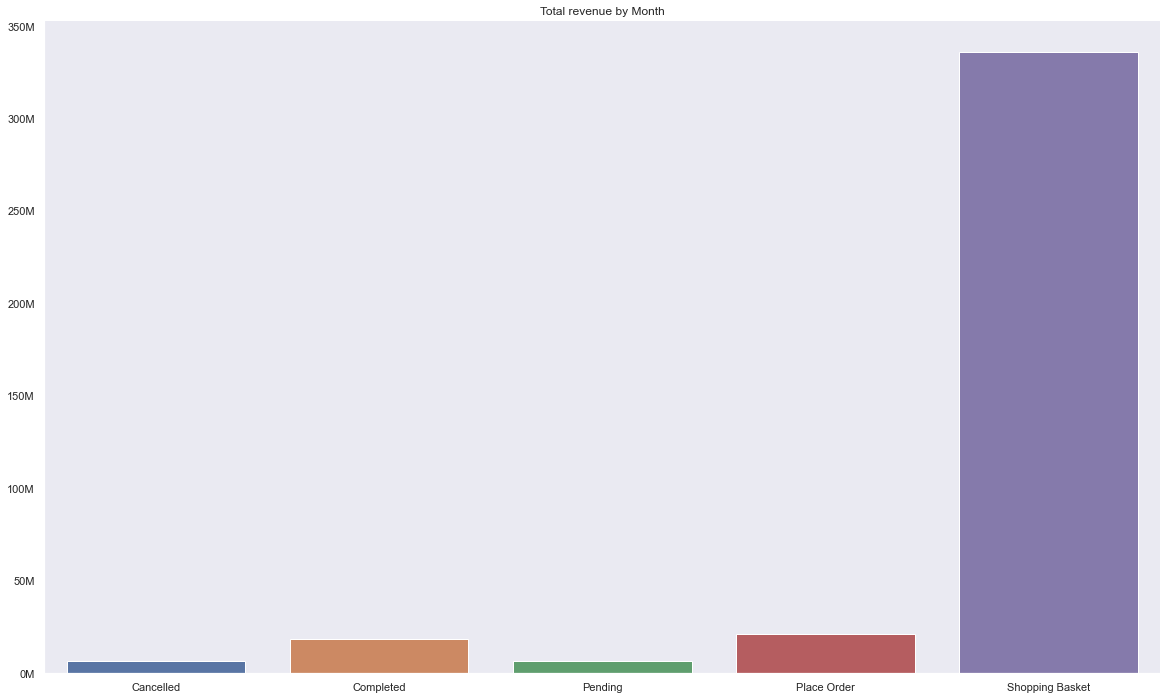

In [197]:
plt.subplots(figsize=(20, 12))
ax = sns.barplot(data = df_merge_all.groupby(['state']).agg({'total_paid': 'sum'}).reset_index(), x = 'state', y = 'total_paid')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xlabel('', fontsize =12)
plt.ylabel('', fontsize =12)
plt.title('Total revenue by Month')
vals = ax.get_yticks()
ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])
sns.despine()

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_19128\402812933.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])


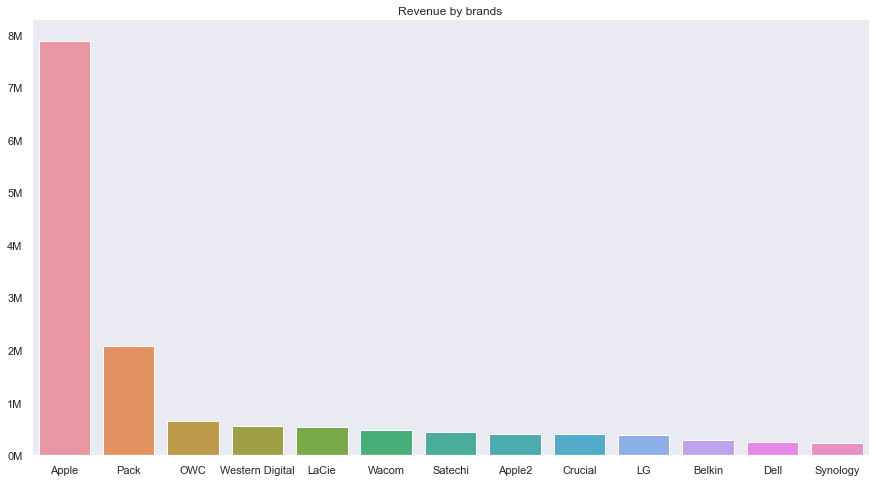

In [194]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=p_df, x='long', y='total_paid')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xlabel('')
plt.ylabel('')
plt.title('Revenue by brands')
vals = ax.get_yticks()
ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])
sns.despine()
plt.savefig('Revenue_by_brand.png')